In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
!pip install squarify
!pip install imblearn
!pip install catboost
!pip install category_encoders openpyxl --quiet
!pip install shap --quiet

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 98.7/98.7 MB 9.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18.3/18.3 MB 93.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85.7/85.7 kB 2.0 MB/s eta 0:00:00


In [3]:
# ÌïúÍ∏Ä Ìè∞Ìä∏(NanumGothic) ÏÑ§Ïπò
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

# MatplotlibÏùò Í∏∞Î≥∏ Ìè∞Ìä∏ ÏÑ§Ï†ï
import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

# NanumGothic Ìè∞Ìä∏ Í≤ΩÎ°ú ÌôïÏù∏ Î∞è Ï†ÅÏö©
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=12)

# MatplotlibÏùò Ìè∞Ìä∏ Ï∫êÏãú ÏÇ≠Ï†ú ÌõÑ ÏóÖÎç∞Ïù¥Ìä∏
fm.fontManager.addfont(font_path)  # Ìè∞Ìä∏ Ï∂îÍ∞Ä
plt.rc("font", family="NanumGothic")

print("ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å!")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126213 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å!


In [4]:
terror_1990 = pd.read_excel('/content/terror_data_city_filled.xlsx')

In [5]:
columns_to_keep = [
     'eventid',
    'iyear', 'imonth', 'iday',
    'success',
    'country_txt', 'region_txt', 'provstate',
    'latitude', 'longitude',
    'attacktype1_txt', 'targtype1_txt', 'natlty1_txt', 'weaptype1_txt',
    'nkill', 'nwound', 'city',
    'gname'
]

# Ìï¥Îãπ Ïª¨ÎüºÎßå ÏÑ†ÌÉù
terror = terror_1990[columns_to_keep]

In [6]:
# Ïª¨Îüº Î™ÖÏùÑ CountryÎ°ú Î∞îÍøà
terror.rename(columns={"country_txt":"Country"},inplace=True)

<ipython-input-6-e8a6cb500f78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror.rename(columns={"country_txt":"Country"},inplace=True)


In [7]:
# Ï§ëÎ≥µ Ï†úÍ±∞ Ï†Ñ Ìñâ Ïàò ÌôïÏù∏
print(f"Ï§ëÎ≥µ Ï†úÍ±∞ Ï†Ñ: {terror.shape[0]} rows")

# 'eventid'ÏôÄ 'Unnamed: 0' Ï†úÏô∏Ìïú Ïª¨Îüº Í∏∞Ï§ÄÏúºÎ°ú Ï§ëÎ≥µ Ï†úÍ±∞
terror = terror.drop_duplicates(subset=[col for col in terror.columns if col not in ['eventid', 'Unnamed: 0']])

# Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Ìñâ Ïàò ÌôïÏù∏
print(f"Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ: {terror.shape[0]} rows")

# 'Unnamed: 0' Ïª¨Îüº ÏÇ≠Ï†ú
terror.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

Ï§ëÎ≥µ Ï†úÍ±∞ Ï†Ñ: 173597 rows
Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ: 167694 rows


<ipython-input-7-8bdaa0f55496>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')


In [8]:
terror_turkey = terror[terror['Country'] == 'Turkey']

In [9]:
# Í≥µÍ≤© Ïú†Ìòï
attacktype_kor = {
    'Bombing/Explosion': 'Ìè≠ÌÉÑ/Ìè≠Î∞ú',
    'Armed Assault': 'Î¨¥Ïû• Í≥µÍ≤©',
    'Unarmed Assault': 'ÎπÑÎ¨¥Ïû• Í≥µÍ≤©',
    'Assassination': 'ÏïîÏÇ¥',
    'Facility/Infrastructure Attack': 'ÏãúÏÑ§/Ïù∏ÌîÑÎùº Í≥µÍ≤©',
    'Hijacking': 'ÎÇ©Ïπò',
    'Hostage Taking (Kidnapping)': 'Ïù∏Ïßà ÎÇ©Ïπò',
    'Hostage Taking (Barricade Incident)': 'Ïù∏Ïßà Ï†êÍ±∞',
    'Unknown': 'Ïïå Ïàò ÏóÜÏùå'
}


# provstate
provstate_kor = {
    'Adana': 'ÏïÑÎã§ÎÇò', 'Adiyaman': 'ÏïÑÎîîÏïºÎßå', 'Agri': 'ÏïÑÏúºÎ•¥', 'Amasya': 'ÏïÑÎßàÏä§Ïïº',
    'Ankara': 'ÏïôÏπ¥Îùº', 'Antalya': 'ÏïàÌÉàÎ¶¨ÏïÑ', 'Ardahan': 'ÏïÑÎ•¥Îã§Ìïú', 'Artvin': 'ÏïÑÎ•¥Ìä∏Îπà',
    'Aydin': 'ÏïÑÏù¥Îîò', 'Balikesir': 'Î∞úÎ¶¨ÏºÄÏãúÎ•¥', 'Batman': 'Î∞îÌä∏Îßå', 'Bingol': 'ÎπôÍ¥º',
    'Bitlis': 'ÎπÑÌãÄÎ¶¨Ïä§', 'Burdur': 'Î∂ÄÎ•¥ÎëêÎ•¥', 'Bursa': 'Î∂ÄÎ•¥ÏÇ¨', 'Cankiri': 'ÏûîÌÅ¨Î•¥',
    'Corum': 'Ï°∞Î£∏', 'Diyarbakir': 'ÎîîÏïºÎ•¥Î∞îÌÅ¨Î•¥', 'Edirne': 'ÏóêÎîîÎ•¥ÎÑ§', 'Elazig': 'ÏóòÎùºÏ¶àÏúº',
    'Erzincan': 'ÏóêÎ•¥ÏßÑÏûî', 'Erzurum': 'ÏóêÎ•¥Ï£ºÎ£∏', 'Eskisehir': 'ÏóêÏä§ÌÇ§ÏÖ∞ÌûàÎ•¥',
    'Gaziantep': 'Í∞ÄÏßÄÏïàÌÖåÌîÑ', 'Giresun': 'Í∏∞Î†àÏàú', 'Gumushane': 'Í∑ÄÎÆàÏÉ§ÎÑ§',
    'Hakkari': 'ÌïòÏπ¥Î¶¨', 'Hatay': 'ÌïòÌÉÄÏù¥', 'Igdir': 'ÏúºÏúºÎìúÎ•¥', 'Isparta': 'Ïù¥Ïä§ÌååÎ•¥ÌÉÄ',
    'Istanbul': 'Ïù¥Ïä§ÌÉÑÎ∂à', 'Izmir': 'Ïù¥Ï¶àÎØ∏Î•¥', 'Kahramanmaras': 'Ïπ¥ÌùêÎùºÎßåÎßàÎùºÏäà',
    'Kars': 'Ïπ¥Î•¥Ïä§', 'Kastamonu': 'Ïπ¥Ïä§ÌÉÄÎ™®ÎàÑ', 'Kayseri': 'Ïπ¥Ïù¥ÏÑ∏Î¶¨', 'Kilis': 'ÌÇ¨Î¶¨Ïä§',
    'Kinkkale': 'ÌÇπÏπºÎ†à', 'Kirikkale': 'ÌÅ¨Î•¥ÏπºÎ†à', 'Kirsehir': 'ÌÅ¨Î•¥ÏÖ∞ÌûàÎ•¥', 'Kocaeli': 'ÏΩîÏûêÏóòÎ¶¨',
    'Konya': 'ÏΩòÏïº', 'Kutahya': 'ÌÄ¥ÌÉÄÌûàÏïº', 'Malatya': 'ÎßêÎùºÌã∞ÏïÑ', 'Manisa': 'ÎßàÎãàÏÇ¨',
    'Mardin': 'ÎßàÎ•¥Îîò', 'Mersin': 'Î©îÎ•¥Ïã†', 'Mugla': 'Î¨¥ÏùÑÎùº', 'Mus': 'Î¨¥Ïäà', 'Nigde': 'ÎãàÎç∞',
    'Ordu': 'Ïò§Î•¥Îëê', 'Osmaniye': 'Ïò§Ïä§ÎßàÎãàÏòà', 'Sakarya': 'ÏÇ¨Ïπ¥Î¶¨Ïïº', 'Samsun': 'ÏÇºÏàú',
    'Sanliurfa': 'ÏÉ®Î•¥Ïö∞Î•¥Ìåå', 'Siirt': 'ÏãúÏù¥Î•¥Ìä∏', 'Sinop': 'ÏãúÎÖ∏ÌîÑ', 'Sirnak': 'Ïâ¨Î•¥ÎÇô',
    'Sivas': 'ÏãúÎ∞îÏä§', 'Tokat': 'ÌÜ†Ïπ¥Ìä∏', 'Trabzon': 'Ìä∏ÎùºÎ∏åÏ°¥', 'Tunceli': 'Ìà∞Ï†§Î¶¨',
    'Unknown': 'ÎØ∏ÏÉÅ', 'Van': 'Î∞ò', 'Zinguldak': 'ÏßÑÍµ¥Îã§ÌÅ¨'
}
# Î¨¥Í∏∞
weapon_type_mapping = {
    "Explosives": "Ìè≠Î∞úÎ¨º",
    "Firearms": "ÌôîÍ∏∞",
    "Unknown": "Ïïå Ïàò ÏóÜÏùå",
    "Incendiary": "Î∞©ÌôîÎ¨º",
    "Melee": "Í∑ºÏ†ë Î¨¥Í∏∞",
    "Chemical": "ÌôîÌïô Î¨ºÏßà",
    "Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Ï∞®Îüâ (Ï∞®Îüâ Ìè≠ÌÉÑ Ï†úÏô∏)",
    "Sabotage Equipment": "ÌååÍ¥¥ Ïû•ÎπÑ",
    "Other": "Í∏∞ÌÉÄ",
    "Biological": "ÏÉùÎ¨ºÌïô Î¨¥Í∏∞",
    "Fake Weapons": "Í∞ÄÏßú Î¨¥Í∏∞",
    "Radiological": "Î∞©ÏÇ¨Îä• Î¨¥Í∏∞"
}
# ÌÉÄÍ≤ü
target_mapping = {
    "Abortion Related": "ÎÇôÌÉú ÏãúÏà†ÏÜå Í¥ÄÎ†®",
    "Airports & Aircraft": "Í≥µÌï≠ Î∞è Ìï≠Í≥µÍ∏∞",
    "Business": "ÏÇ¨ÏóÖÏ≤¥",
    "Educational Institution": "ÍµêÏú° Í∏∞Í¥Ä",
    "Food or Water Supply": "ÏãùÎüâ ÎòêÎäî ÏàòÎèÑ",
    "Government (Diplomatic)": "Ï†ïÎ∂Ä (Ïô∏Íµê)",
    "Government (General)": "Ï†ïÎ∂Ä (ÏùºÎ∞ò)",
    "Journalists & Media": "Ïñ∏Î°† Î∞è ÎØ∏ÎîîÏñ¥",
    "Maritime": "Ìï¥ÏÉÅ",
    "Military": "Íµ∞",
    "NGO": "ÎπÑÏ†ïÎ∂ÄÍ∏∞Íµ¨",
    "Other": "Í∏∞ÌÉÄ",
    "Police": "Í≤ΩÏ∞∞",
    "Private Citizens & Property": "ÎØºÍ∞ÑÏù∏ Î∞è Ïû¨ÏÇ∞",
    "Religious Figures/Institutions": "Ï¢ÖÍµê Ïù∏Î¨º/Í∏∞Í¥Ä",
    "Telecommunication": "ÌÜµÏã†",
    "Terrorists/Non-State Militia": "ÌÖåÎü¨Î¶¨Ïä§Ìä∏/ÎπÑÍµ≠Í∞Ä ÎØºÎ≥ëÎåÄ",
    "Tourists": "Í¥ÄÍ¥ëÍ∞ù",
    "Transportation": "ÍµêÌÜµ",
    "Unknown": "Ïïå Ïàò ÏóÜÏùå",
    "Utilities": "Í≥µÍ≥µÏãúÏÑ§",
    "Violent Political Party": "Ìè≠Î†•Ï†Å Ï†ïÏπòÎã®Ï≤¥"
}
# ÏßÄÏó≠
region_mapping = {
    "Middle East & North Africa": "Ï§ëÎèô Î∞è Î∂ÅÏïÑÌîÑÎ¶¨Ïπ¥",
    "South Asia": "ÎÇ®ÏïÑÏãúÏïÑ",
    "Southeast Asia": "ÎèôÎÇ®ÏïÑÏãúÏïÑ",
    "Sub-Saharan Africa": "ÏÇ¨ÌïòÎùº Ïù¥ÎÇ® ÏïÑÌîÑÎ¶¨Ïπ¥",
    "Eastern Europe": "ÎèôÏú†ÎüΩ",
    "Western Europe": "ÏÑúÏú†ÎüΩ",
    "East Asia": "ÎèôÏïÑÏãúÏïÑ",
    "Central Asia": "Ï§ëÏïôÏïÑÏãúÏïÑ",
    "North America": "Î∂ÅÏïÑÎ©îÎ¶¨Ïπ¥",
    "South America": "ÎÇ®ÏïÑÎ©îÎ¶¨Ïπ¥",
    "Central America & Caribbean": "Ï§ëÏïôÏïÑÎ©îÎ¶¨Ïπ¥ Î∞è Ïπ¥Î¶¨Î∏åÌï¥",
    "Australasia & Oceania": "Ïò§ÏÑ∏ÏïÑÎãàÏïÑ"
}

#Î≤àÏó≠ Ï†ÅÏö©
terror_turkey['attacktype1_txt'] = terror_turkey['attacktype1_txt'].map(attacktype_kor).fillna(terror_turkey['attacktype1_txt'])
terror_turkey['targtype1_txt'] = terror_turkey['targtype1_txt'].map(target_mapping).fillna(terror_turkey['targtype1_txt'])
terror_turkey['weaptype1_txt'] = terror_turkey['weaptype1_txt'].map(weapon_type_mapping).fillna(terror_turkey['weaptype1_txt'])
terror_turkey['region_txt'] = terror_turkey['region_txt'].map(region_mapping).fillna(terror_turkey['region_txt'])

# ÎØ∏Íµ≠ Ï£º Ïù¥Î¶ÑÎèÑ ÌïúÍ∏ÄÎ°ú Î≥ÄÌôò!
terror_turkey['provstate'] = terror_turkey['provstate'].map(provstate_kor).fillna(terror_turkey['provstate'])

<ipython-input-9-7120e3421ce0>:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_turkey['attacktype1_txt'] = terror_turkey['attacktype1_txt'].map(attacktype_kor).fillna(terror_turkey['attacktype1_txt'])
<ipython-input-9-7120e3421ce0>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_turkey['targtype1_txt'] = terror_turkey['targtype1_txt'].map(target_mapping).fillna(terror_turkey['targtype1_txt'])
<ipython-input-9-7120e3421ce0>:94: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [10]:
# ÎÇ†Ïßú Ïª¨Îüº ÏÉùÏÑ± (Í≤∞Ï∏°Í∞í Î∞©ÏßÄÏö© try-except)
def get_weekday(row):
    try:
        date = pd.to_datetime(f"{int(row['iyear'])}-{int(row['imonth'])}-{int(row['iday'])}", errors='coerce')
        return date.day_name() if pd.notnull(date) else None
    except:
        return None

# ÏöîÏùº Ïª¨Îüº Ï∂îÍ∞Ä
terror_turkey['weekday'] = terror_turkey.apply(get_weekday, axis=1)
# Í≤∞Ï∏°Ïπò ÏöîÏùº ‚Üí "Unknown"ÏúºÎ°ú ÎåÄÏ≤¥
terror_turkey['weekday'] = terror_turkey['weekday'].fillna('Unknown')


<ipython-input-10-bafef8ea547f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_turkey['weekday'] = terror_turkey.apply(get_weekday, axis=1)
<ipython-input-10-bafef8ea547f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_turkey['weekday'] = terror_turkey['weekday'].fillna('Unknown')


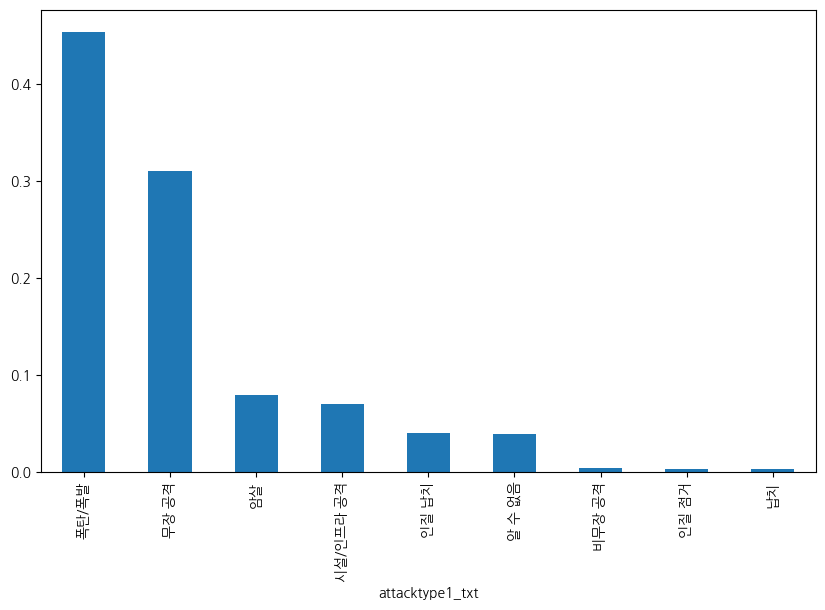

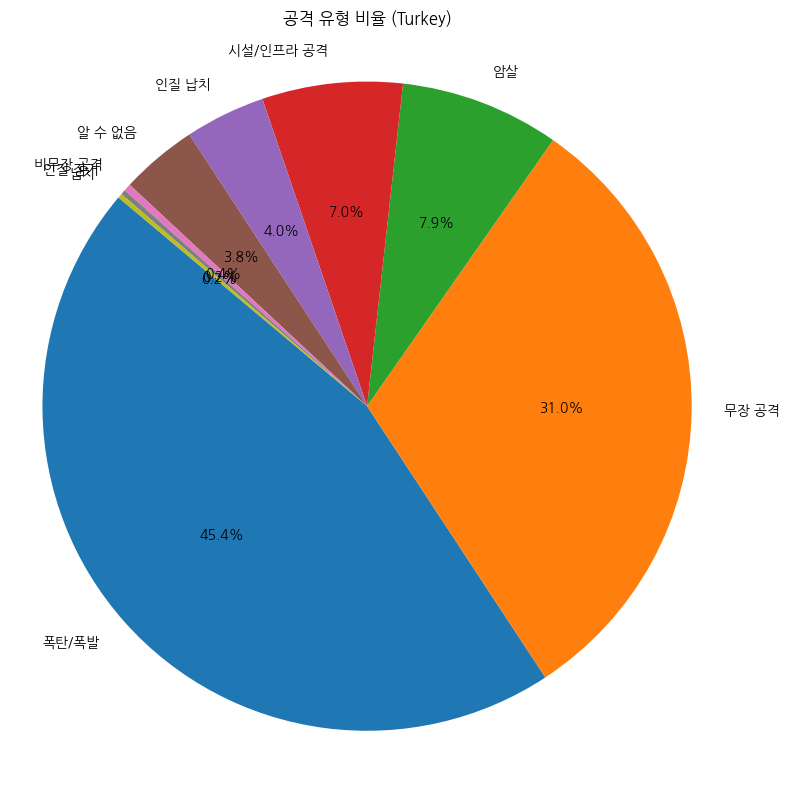

In [11]:
# Attack type proportions
attack_counts = terror_turkey['attacktype1_txt'].value_counts(normalize=True)

# Plotting - Vertical Bar Chart
plt.figure(figsize=(10, 6))
attack_counts.plot(kind='bar')

# ÌååÏù¥ Ï∞®Ìä∏Î°ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 8))
plt.pie(attack_counts, labels=attack_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Í≥µÍ≤© Ïú†Ìòï ÎπÑÏú® (Turkey)")
plt.axis('equal')  # ÎèôÍ∑∏ÎûÄ Ïõê Ïú†ÏßÄ
plt.tight_layout()
plt.show()

attacktype1_txt
ÏïîÏÇ¥           0.765734
Ïïå Ïàò ÏóÜÏùå       0.884058
Ïù∏Ïßà Ï†êÍ±∞        0.888889
Ìè≠ÌÉÑ/Ìè≠Î∞ú        0.895961
ÎπÑÎ¨¥Ïû• Í≥µÍ≤©       0.923077
Î¨¥Ïû• Í≥µÍ≤©        0.948122
ÏãúÏÑ§/Ïù∏ÌîÑÎùº Í≥µÍ≤©    0.964286
Ïù∏Ïßà ÎÇ©Ïπò        0.993056
ÎÇ©Ïπò           1.000000
Name: success, dtype: float64


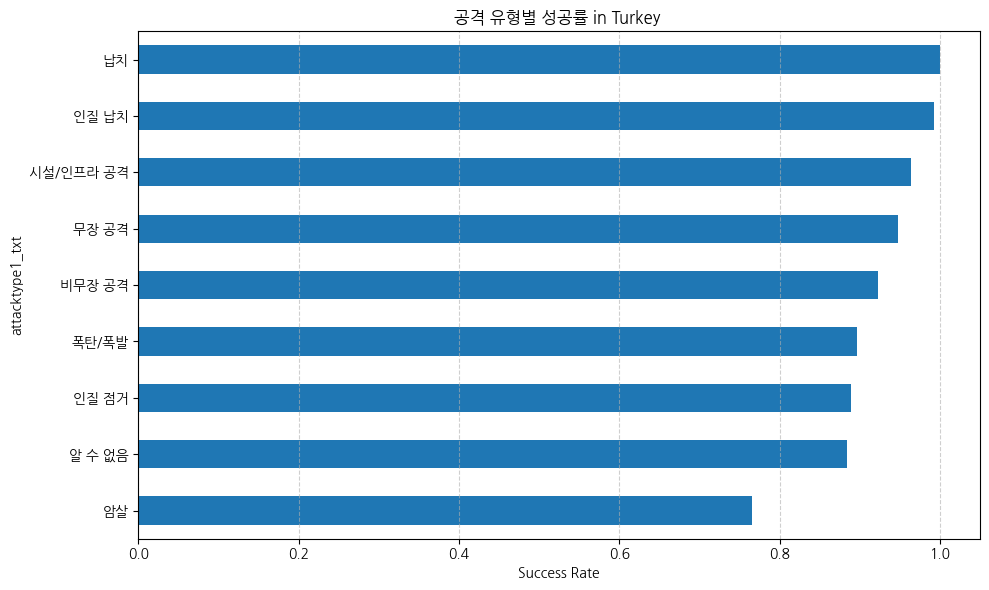

In [12]:
# Í≥µÍ≤© Ïú†ÌòïÎ≥Ñ ÏÑ±Í≥µÎ•† Í≥ÑÏÇ∞
attack_success_rate = terror_turkey.groupby('attacktype1_txt')['success'].mean().sort_values()
print(attack_success_rate)
# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
attack_success_rate.plot(kind='barh')
plt.xlabel('Success Rate')
plt.title('Í≥µÍ≤© Ïú†ÌòïÎ≥Ñ ÏÑ±Í≥µÎ•† in Turkey ')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [46]:
from scipy.stats import chi2_contingency

# Í≥µÍ≤©Ïú†Ìòï vs ÏÑ±Í≥µÏó¨Î∂Ä ÍµêÏ∞®Ìëú ÏÉùÏÑ±
crosstab = pd.crosstab(terror_turkey['attacktype1_txt'], terror_turkey['success'])

# Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï ÏàòÌñâ
chi2, p, dof, expected = chi2_contingency(crosstab)

# Í≤∞Í≥º Ï†ïÎ¶¨
{
    "Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ": float(round(chi2, 3)),
    "p-value": float(round(p, 4)),
    "ÏûêÏú†ÎèÑ": dof
}

{'Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ': 120.036, 'p-value': 0.0, 'ÏûêÏú†ÎèÑ': 8}

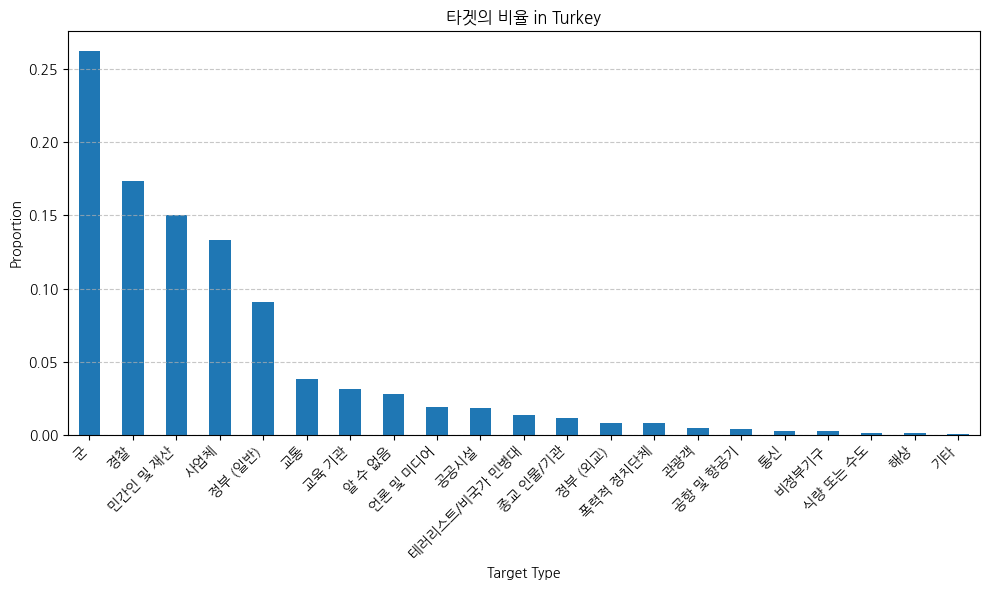

In [13]:
# Target type proportions
target_counts = terror_turkey['targtype1_txt'].value_counts(normalize=True)

# Plot
plt.figure(figsize=(10, 6))
target_counts.plot(kind='bar')

plt.ylabel('Proportion')
plt.xlabel('Target Type')
plt.title('ÌÉÄÍ≤üÏùò ÎπÑÏú® in Turkey')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

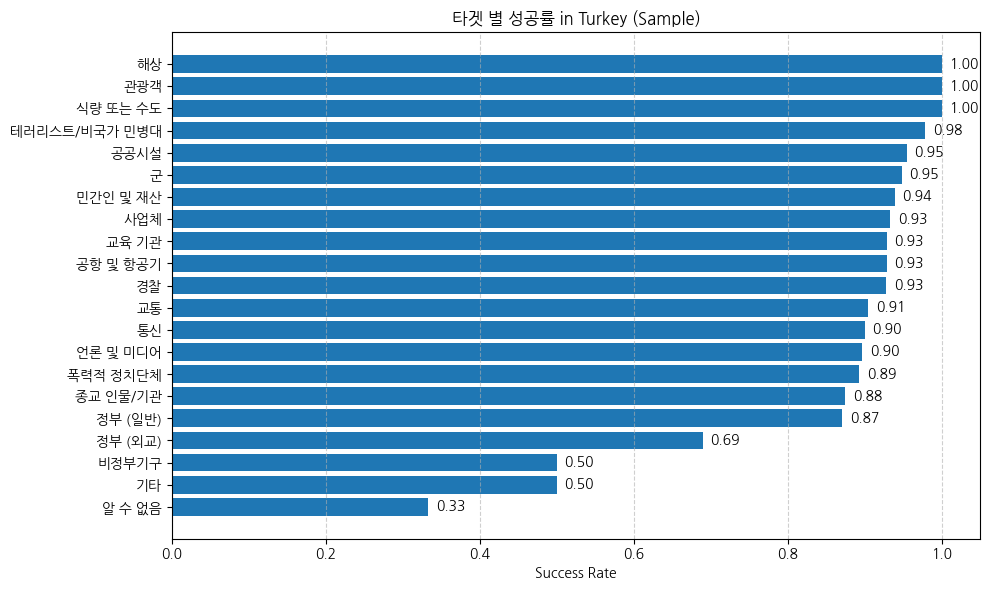

In [14]:
# ÌÉÄÍ≤ü Ïú†ÌòïÎ≥Ñ ÏÑ±Í≥µÎ•† Í≥ÑÏÇ∞
target_success_rate = terror_turkey.groupby('targtype1_txt')['success'].mean().sort_values()

# ÏãúÍ∞ÅÌôî (ÏÑ±Í≥µÎ•† Í∞í Ìè¨Ìï®)
plt.figure(figsize=(10, 6))
bars = plt.barh(target_success_rate.index, target_success_rate.values)

# ÏÑ±Í≥µÎ•† ÌÖçÏä§Ìä∏ Ï∂îÍ∞Ä
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}', va='center')

plt.xlabel('Success Rate')
plt.title('ÌÉÄÍ≤ü Î≥Ñ ÏÑ±Í≥µÎ•† in Turkey (Sample)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

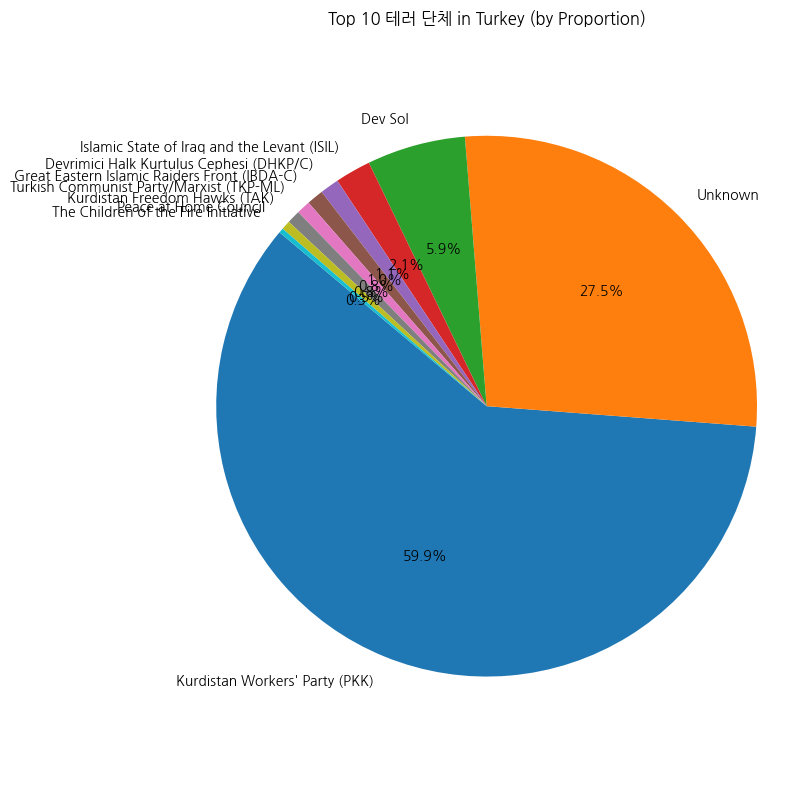

In [15]:
# gname ÏÉÅÏúÑ 10Í∞ú Í∑∏Î£π ÎπÑÏú® Í≥ÑÏÇ∞ (ÌÑ∞ÌÇ§ Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä)
top_groups = terror_turkey['gname'].value_counts().nlargest(10)
top_groups_share = top_groups / top_groups.sum()

# ÌååÏù¥Ï∞®Ìä∏ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 8))
plt.pie(top_groups_share, labels=top_groups.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 ÌÖåÎü¨ Îã®Ï≤¥ in Turkey (by Proportion)')
plt.axis('equal')  # ÏõêÌòï Ïú†ÏßÄ
plt.tight_layout()
plt.show()

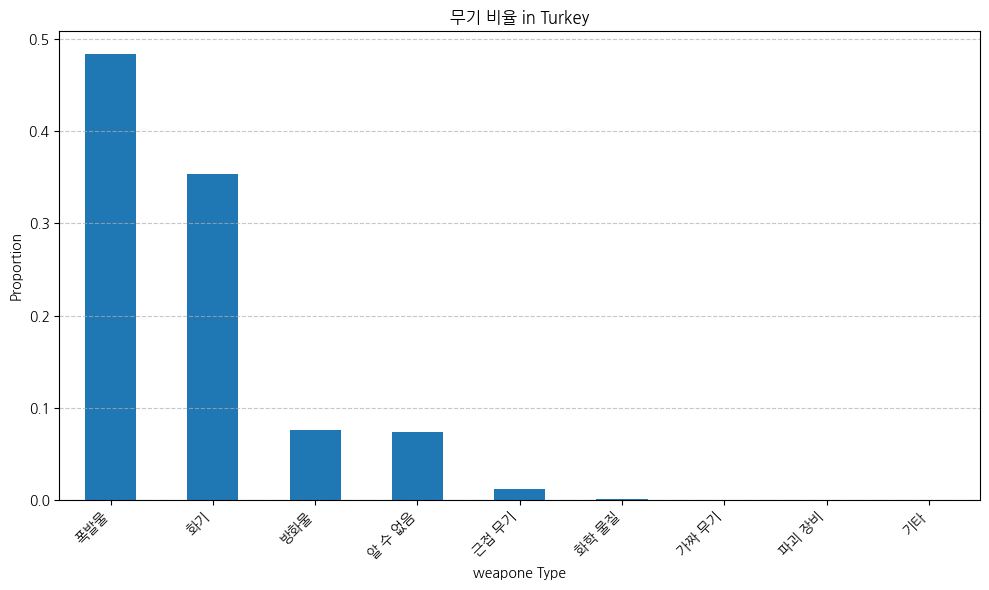

In [17]:
# Target type proportions
weap_count = terror_turkey['weaptype1_txt'].value_counts(normalize=True)

# Plot
plt.figure(figsize=(10, 6))
weap_count.plot(kind='bar')

plt.ylabel('Proportion')
plt.xlabel('weapone Type')
plt.title('Î¨¥Í∏∞ ÎπÑÏú® in Turkey')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

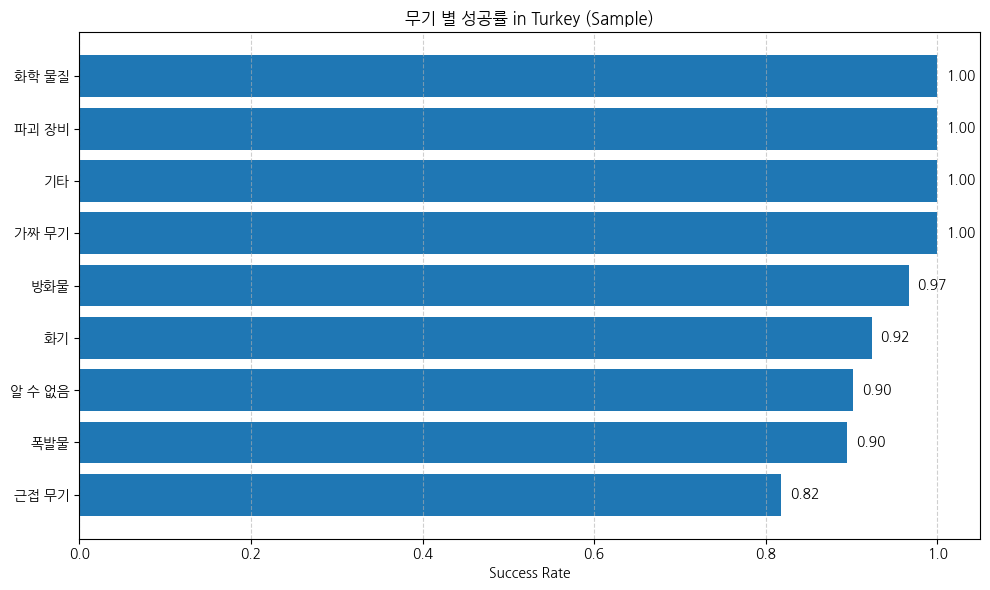

In [18]:
# Î¨¥Í∏∞ Ïú†ÌòïÎ≥Ñ ÏÑ±Í≥µÎ•† Í≥ÑÏÇ∞
weapon_success_rate = terror_turkey.groupby('weaptype1_txt')['success'].mean().sort_values()

# ÏãúÍ∞ÅÌôî (ÏÑ±Í≥µÎ•† Í∞í Ìè¨Ìï®)
plt.figure(figsize=(10, 6))
bars = plt.barh(weapon_success_rate.index, weapon_success_rate.values)

# ÏÑ±Í≥µÎ•† ÌÖçÏä§Ìä∏ Ï∂îÍ∞Ä
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}', va='center')

plt.xlabel('Success Rate')
plt.title('Î¨¥Í∏∞ Î≥Ñ ÏÑ±Í≥µÎ•† in Turkey (Sample)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

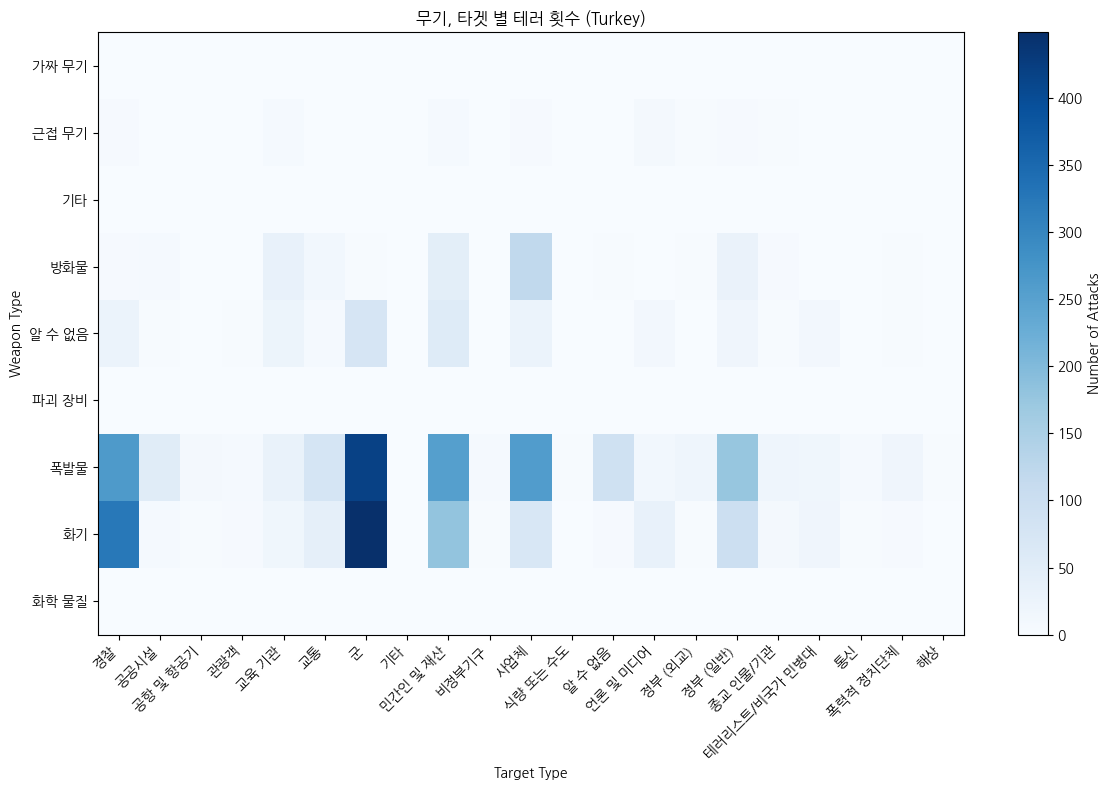

In [19]:
# Î¨¥Í∏∞ Ïú†ÌòïÍ≥º ÌÉÄÍ≤ü Ïú†Ìòï ÍµêÏ∞® ÎπàÎèÑ ÌÖåÏù¥Î∏î ÏÉùÏÑ±
cross_tab = pd.crosstab(terror_turkey['weaptype1_txt'], terror_turkey['targtype1_txt'])

# ÏãúÍ∞ÅÌôî - heatmap Ïä§ÌÉÄÏùº
plt.figure(figsize=(12, 8))
plt.imshow(cross_tab, cmap='Blues', aspect='auto')
plt.colorbar(label='Number of Attacks')
plt.xticks(ticks=range(len(cross_tab.columns)), labels=cross_tab.columns, rotation=45, ha='right')
plt.yticks(ticks=range(len(cross_tab.index)), labels=cross_tab.index)
plt.title('Î¨¥Í∏∞, ÌÉÄÍ≤ü Î≥Ñ ÌÖåÎü¨ ÌöüÏàò (Turkey)')
plt.xlabel('Target Type')
plt.ylabel('Weapon Type')
plt.tight_layout()
plt.show()

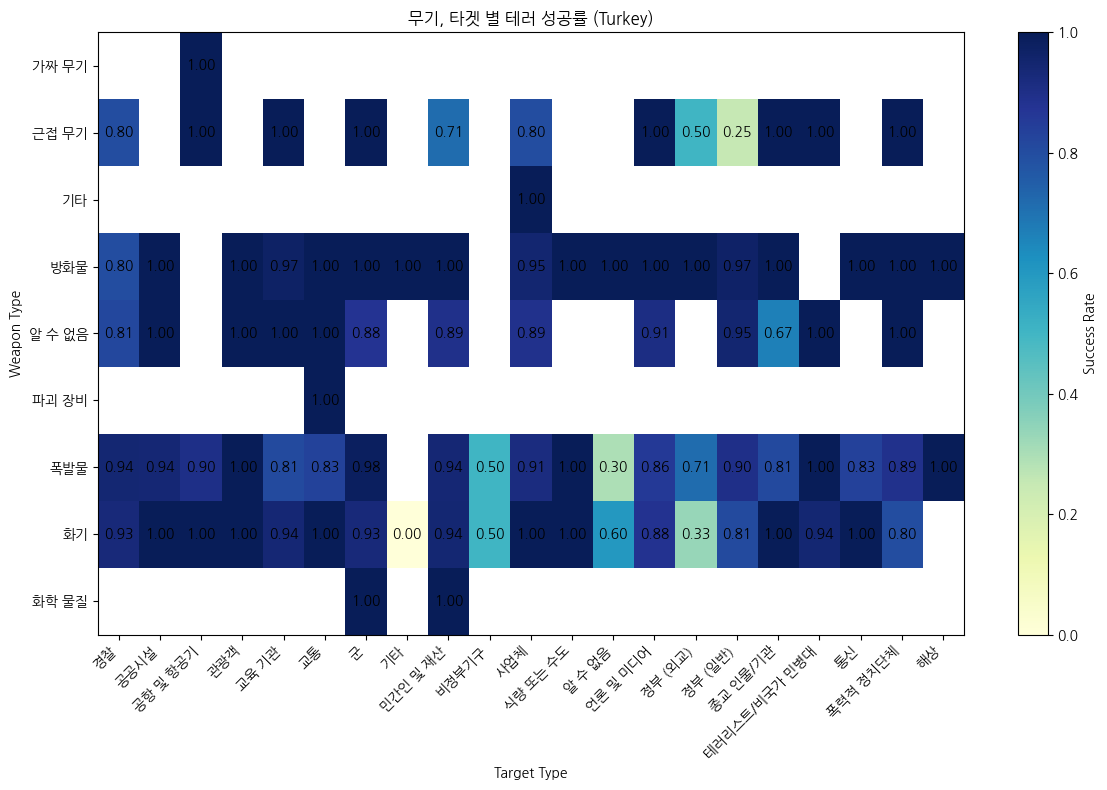

In [20]:
# Î¨¥Í∏∞-ÌÉÄÍ≤ü Ï°∞Ìï©Î≥Ñ ÏÑ±Í≥µÎ•† Í≥ÑÏÇ∞
weapon_target_success = terror_turkey.groupby(['weaptype1_txt', 'targtype1_txt'])['success'].mean().unstack()

# ÌûàÌä∏ÎßµÏùÑ ÌÖçÏä§Ìä∏ Ìè¨Ìï®ÏúºÎ°ú Îã§Ïãú Í∑∏Î¶º
plt.figure(figsize=(12, 8))
plt.imshow(weapon_target_success, cmap='YlGnBu', aspect='auto', vmin=0, vmax=1)
plt.colorbar(label='Success Rate')

# Ï∂ï ÏÑ§Ï†ï
xticks = range(len(weapon_target_success.columns))
yticks = range(len(weapon_target_success.index))
plt.xticks(ticks=xticks, labels=weapon_target_success.columns, rotation=45, ha='right')
plt.yticks(ticks=yticks, labels=weapon_target_success.index)

# ÏÖÄÎßàÎã§ ÏÑ±Í≥µÎ•† Í∞í ÌÖçÏä§Ìä∏ Ï∂îÍ∞Ä
for i in yticks:
    for j in xticks:
        value = weapon_target_success.iloc[i, j]
        if pd.notna(value):
            plt.text(j, i, f'{value:.2f}', ha='center', va='center', color='black')

plt.title('Î¨¥Í∏∞, ÌÉÄÍ≤ü Î≥Ñ ÌÖåÎü¨ ÏÑ±Í≥µÎ•† (Turkey)')
plt.xlabel('Target Type')
plt.ylabel('Weapon Type')
plt.tight_layout()
plt.show()

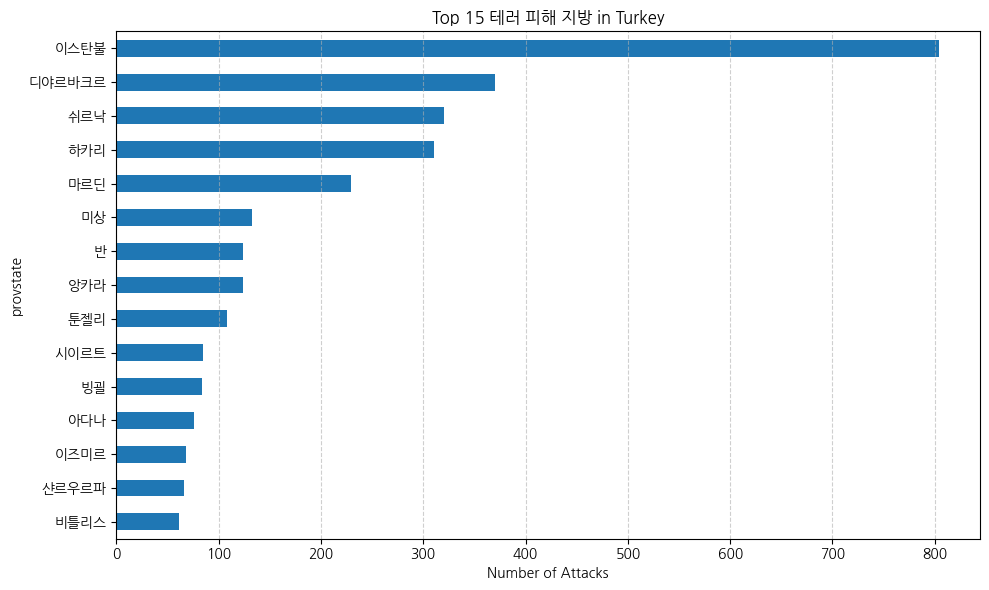

In [22]:
# Ï£º(state)Î≥Ñ ÌÖåÎü¨ Î∞úÏÉù Í±¥Ïàò Í≥ÑÏÇ∞ (ÏÉÅÏúÑ 15Í∞ú)
state_counts = terror_turkey['provstate'].value_counts().head(15).sort_values()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
state_counts.plot(kind='barh')
plt.xlabel('Number of Attacks')
plt.title('Top 15 ÌÖåÎü¨ ÌîºÌï¥ ÏßÄÎ∞© in Turkey')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

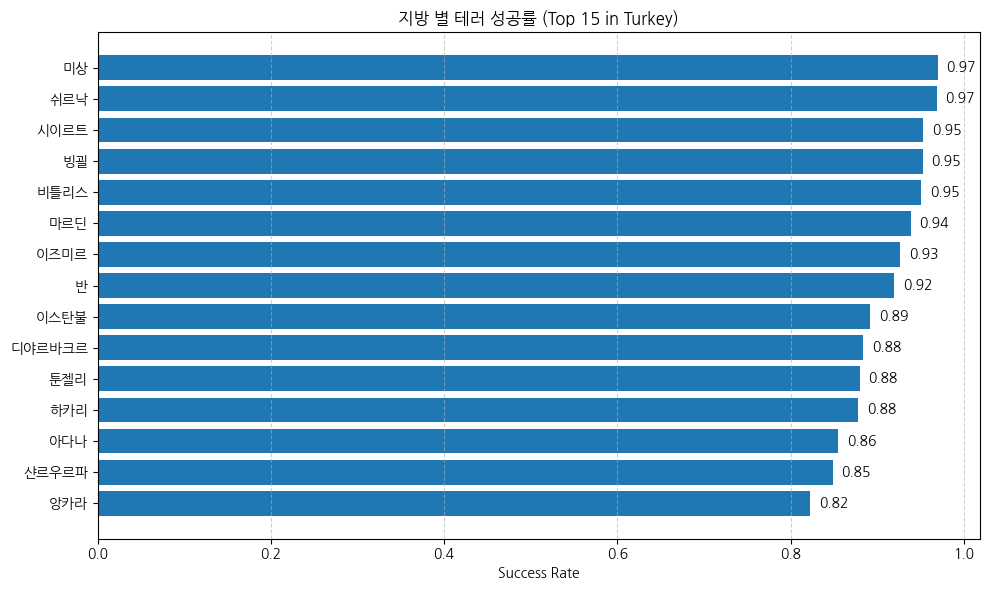

In [23]:
top15_states = terror_turkey['provstate'].value_counts().head(15).index

# Ìï¥Îãπ Ï£ºÎì§Îßå ÌïÑÌÑ∞ÎßÅ ÌõÑ ÏÑ±Í≥µÎ•† Í≥ÑÏÇ∞
state_success_rate = terror_turkey[terror_turkey['provstate'].isin(top15_states)].groupby('provstate')['success'].mean().sort_values()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
bars = plt.barh(state_success_rate.index, state_success_rate.values)

# ÏÑ±Í≥µÎ•† ÌÖçÏä§Ìä∏ ÌëúÏãú
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}', va='center')

plt.xlabel('Success Rate')
plt.title('ÏßÄÎ∞© Î≥Ñ ÌÖåÎü¨ ÏÑ±Í≥µÎ•† (Top 15 in Turkey)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Ï∂îÏ†ï Î≥¥Ïïà Ï†ïÏ±Ö (Ïú†Ìö®ÎèÑ Ïàú)

1) Í∞ÄÏû• Ï§ëÏöîÌïú ÌÉÄÍ≤ü: targtype1_txt_Unknown, Government, Transportation

Ï†ïÏ±Ö: Í∞úÏù∏ Î¨¥Ï£ÑÏù∏ ÌÉÄÍ≤ü ÏóÜÏùå(Í∞ÄÏÇ¨Ìôî), Íµ≠Í∞Ä Íµ∞ÏÇ¨/Í≤åÏù¥ÎØ∏ Í¥ÄÎ†® Í∏∞Í¥Ä, ÍµêÌÜµ Í∏∞Í¥Ä Î∞è ÏãúÏÑ§Ïùò Î≥¥Ìò∏ Í∞ïÌôî

Íµ¨Ï≤¥ Î∞©Ïïà:

- Ï∂úÏûÖ ÌÜµÏ†ú Í∞ïÌôî

- CCTV ÏÑ§Ïπò, Î∞úÏÇ¨Î≤ï ÎåÄÎπÑ ÏàòÏπò

- ÏùòÏã¨Ïä§Îü¨Ïö¥ ÌñâÎèô AI Í≤ÄÏÇ¨

2) Í∞ÄÏû• ÏúÑÌóòÌïú Í≥µÍ≤© Ïú†Ìòï: Assassination, Bombing, Melee

Ï†ïÏ±Ö: Í∞ÄÏû• Î≥µÏû°Ìïú Í≥µÍ≤© Ïú†ÌòïÏóê ÎåÄÌïú Ï†ÑÎ¨∏ Í≤ÄÏö© Î≥¥Í±¥ Í∞ïÌôî

Íµ¨Ï≤¥ Î∞©Ïïà:

- Ìè≠Î∞úÎ¨º ÌÉêÏßÄ ÌõàÎ†® Í∞ïÌôî

- Ï†ïÏπòÏù∏, Í≥µÏßÄÏù∏ Í∞úÏù∏ Í±¥Í∞ï Í±¥Î¨º Í≤ÄÍ±¥ Í≤ÄÌÜ†

- SNS/Î©îÏãúÏßÄ Î™®ÎãàÌÑ∞ÎßÅ ÌÜµÌï¥ Í≤ÄÏÇ¨

3) Í≥†ÏúÑÌòï ÏßÄÏó≠: Sirnak, Ankara, Adana, Diyarbakir

Ï†ïÏ±Ö: ÌäπÏ†ï ÏßÄÏó≠Ïóê ÎåÄÌïú ÏßÄÏó≠Ï†Å Î≥¥Ïïà Í∞úÎ∞ú

Íµ¨Ï≤¥ Î∞©Ïïà:

- ÏßÄÏó≠ Í≤åÏù¥ÎØ∏, Í≤ΩÏ∞∞ Í∞ïÌôî Í≥º Í≥µÏ°∞

- ÌäπÏ†ï Í∏∞Í∞Ñ (Ï†ïÏπò Í≤ΩÏ†ú ÌñâÏÇ¨ Ïãú) ÏßÄÎ∞© Í∞êÏßÄ Í∞ïÌôî

4) ÏöîÏùº Ìö®Í≥º: Sunday, Friday

Ï†ïÏ±Ö: ÌäπÏ†ï ÏöîÏùº Î∞©Ïïà Í∞ïÌôî

Íµ¨Ï≤¥ Î∞©Ïïà:

- Í≤ΩÏ∞∞/Íµ∞ Í∑úÎ™® ÏñëÏãù Ï¶ùÍ∞Ä

- Í≥µÍ≥µ Í±¥ÏÑ§Ïóê ÎåÄÌïú ÌÜµÏûÖ Í∞êÏßÄ Í∞ïÌôî

In [27]:
!pip install category_encoders

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:32:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score     support
Fail           0.800000  0.187500  0.303797   64.000000
Success        0.926346  0.995434  0.959648  657.000000
accuracy       0.923717  0.923717  0.923717    0.923717
macro avg      0.863173  0.591467  0.631723  721.000000
weighted avg   0.915130  0.923717  0.901431  721.000000


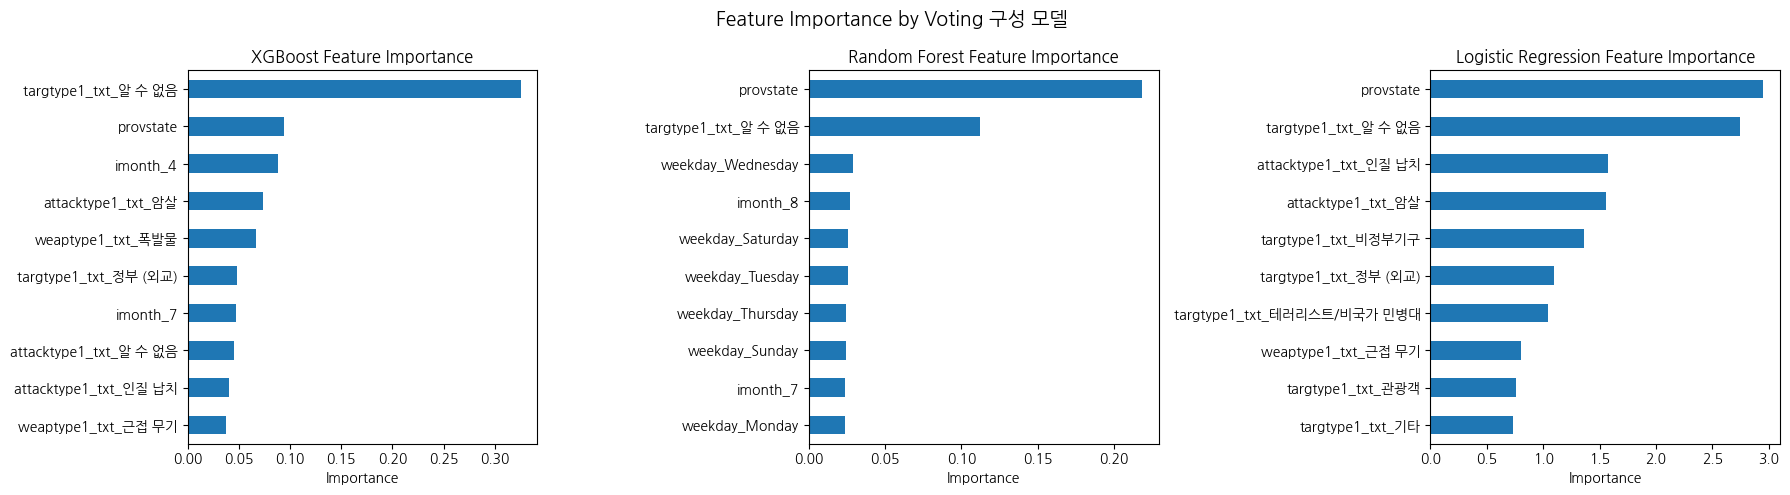

In [36]:
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report
import xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib


categorical_1hot = ['attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'weekday', 'imonth']
categorical_target = ['provstate']
numeric = []
target = 'success'

# Í≤∞Ï∏°Ïπò Ï†úÍ±∞ Î∞è Î∂ÑÌï†
data = terror_turkey[categorical_1hot + categorical_target + numeric + [target]].dropna()
X = data[categorical_1hot + categorical_target + numeric]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ïù∏ÏΩîÎî© Íµ¨ÏÑ±
target_encoder = TargetEncoder()
X_train_prov = target_encoder.fit_transform(X_train[categorical_target], y_train)
X_test_prov = target_encoder.transform(X_test[categorical_target])

column_transformer = ColumnTransformer(transformers=[
    ('cat1hot', OneHotEncoder(handle_unknown='ignore'), categorical_1hot)#,
    #('num', SimpleImputer(strategy='mean'), numeric)
])
X_train_rest = column_transformer.fit_transform(X_train)
X_test_rest = column_transformer.transform(X_test)

# Ïª¨ÎüºÎ™Ö Íµ¨ÏÑ±
ohe = column_transformer.named_transformers_['cat1hot']
onehot_feature_names = ohe.get_feature_names_out(categorical_1hot)
final_feature_names = list(onehot_feature_names) + numeric + categorical_target

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
X_train_rest_df = pd.DataFrame(X_train_rest.toarray() if hasattr(X_train_rest, "toarray") else X_train_rest,
                               columns=list(onehot_feature_names) + numeric)
X_test_rest_df = pd.DataFrame(X_test_rest.toarray() if hasattr(X_test_rest, "toarray") else X_test_rest,
                              columns=list(onehot_feature_names) + numeric)

X_train_encoded = pd.concat([X_train_rest_df.reset_index(drop=True), X_train_prov.reset_index(drop=True)], axis=1)
X_test_encoded = pd.concat([X_test_rest_df.reset_index(drop=True), X_test_prov.reset_index(drop=True)], axis=1)
X_train_encoded.columns = final_feature_names
X_test_encoded.columns = final_feature_names

# Voting Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ
tuned_xgb = xgboost.XGBClassifier(
    learning_rate=0.05,
    max_depth=3,
    n_estimators=50,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

voting_model_tuned = VotingClassifier(
    estimators=[('xgb', tuned_xgb), ('rf', rf_model), ('lr', lr_model)],
    voting='soft'
)
voting_model_tuned.fit(X_train_encoded, y_train)

#  ÏòàÏ∏°
y_pred_voting = voting_model_tuned.predict(X_test_encoded)

# ÏÑ±Îä•Ìëú ÏÉùÏÑ±
report_dict = classification_report(y_test, y_pred_voting, target_names=["Fail", "Success"], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ¶¨
report_df = report_df[['precision', 'recall', 'f1-score', 'support']]
print(report_df)

# Ï§ëÏöîÎèÑ Ï∂îÏ∂ú Î∞è ÏãúÍ∞ÅÌôî
xgb_model_final = voting_model_tuned.named_estimators_['xgb']
xgb_importances = pd.Series(xgb_model_final.feature_importances_, index=final_feature_names).sort_values(ascending=False)

rf_model_final = voting_model_tuned.named_estimators_['rf']
rf_importances = pd.Series(rf_model_final.feature_importances_, index=final_feature_names).sort_values(ascending=False)

lr_model_final = voting_model_tuned.named_estimators_['lr']
lr_importances = pd.Series(abs(lr_model_final.coef_[0]), index=final_feature_names).sort_values(ascending=False)

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
xgb_importances.head(10).plot(kind='barh', ax=axes[0], title='XGBoost Feature Importance')
rf_importances.head(10).plot(kind='barh', ax=axes[1], title='Random Forest Feature Importance')
lr_importances.head(10).plot(kind='barh', ax=axes[2], title='Logistic Regression Feature Importance')

for ax in axes:
    ax.invert_yaxis()
    ax.set_xlabel("Importance")

plt.suptitle("Feature Importance by Voting Íµ¨ÏÑ± Î™®Îç∏ ", fontsize=14)
plt.tight_layout()
plt.show()

# Î™®Îç∏Í≥º Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• (ÌòÑÏû¨ ÎîîÎ†âÌÜ†Î¶¨Ïóê Ï†ÄÏû•)
joblib.dump(xgb_model_final, "xgb_model.pkl")
X_train_encoded.to_csv("X_train_encoded.csv", index=False)

1.  ÏÇ¨Ïö©Ìïú Îç∞Ïù¥ÌÑ∞ Î∞è ÌîºÏ≤ò Íµ¨ÏÑ±
Ìï≠Î™©	ÏÑ§Î™Ö
- Îç∞Ïù¥ÌÑ∞	terror_turkey.xlsx (ÌäÄÎ•¥ÌÇ§Ïòà ÎÇ¥ ÌÖåÎü¨ ÏÇ¨Í±¥ Ï†ïÎ≥¥)
- ÌÉÄÍ≤ü	success (0: Ïã§Ìå®, 1: ÏÑ±Í≥µ)
- Ï£ºÏöî ÌîºÏ≤ò	attacktype1_txt, targtype1_txt, weaptype1_txt, weekday, imonth, provstate

3.  ÌîºÏ≤ò Ïù∏ÏΩîÎî© Ï†ÑÎûµ

- Î≤îÏ£ºÌòï (Ìï¥ÏÑù Ï§ëÏöî)
attacktype1_txt, targtype1_txt, weaptype1_txt, weekday
üéØ One-Hot Encoding
SHAP Î∞è Ï†ïÏ±Ö Ìï¥ÏÑùÏùÑ ÏúÑÌï¥ Î≤îÏ£º Ïú†ÏßÄ

- Î≤îÏ£ºÌòï (ÏßÄÏó≠)
provstate
üéØ Target Encoding
ÏßÄÏó≠Î≥Ñ ÏÑ±Í≥µÎ•† ÏöîÏïΩÏúºÎ°ú Í∞ÑÍ≤∞ÌïòÍ≤å Ï≤òÎ¶¨

- ÏàòÏπòÌòï
imonth
‚ùå Ïù∏ÏΩîÎî© ÏóÜÏù¥ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
Í≥ÑÏ†à/ÏãúÍ∏∞ Ï†ïÎ≥¥ Î≥¥Ï°¥ Î™©Ï†Å


4.  Î™®Îç∏ Íµ¨ÏÑ± (ÏïôÏÉÅÎ∏î)
VotingClassifier (Soft Voting) ‚Äì ÏÑ∏ Î™®Îç∏Ïùò ÏòàÏ∏° ÌôïÎ•† ÌèâÍ∑†ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏ¢Ö ÏòàÏ∏°


-  XGBoost	üéØ GridSearchCVÎ°ú ÌäúÎãùÎêú ÏÑ±Îä• ÏµúÏ†ÅÌôî Î™®Îç∏
-  Random Forest	Î∂ÑÏÇ∞ ÎÜíÏùÄ ÌîºÏ≤òÏóêÎèÑ Í∞ïÌïú Ìä∏Î¶¨ ÏïôÏÉÅÎ∏î
-  Logistic Regression	Ìï¥ÏÑù Í∞ÄÎä•Ìïú ÏÑ†Ìòï Î™®Îç∏ Íµ¨ÏÑ± Ìè¨Ìï®

5. üîç Grid Search (ÌäúÎãù)

- XGBoost
‚úÖ ÏÇ¨Ïö©
learning_rate=0.05, max_depth=3, n_estimators=50
- RF, LR
‚ùå Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞	(Voting Î™®Îç∏ ÎÇ¥Î∂ÄÏóêÏÑúÎßå ÏÇ¨Ïö©)

In [25]:
!pip install shap --quiet

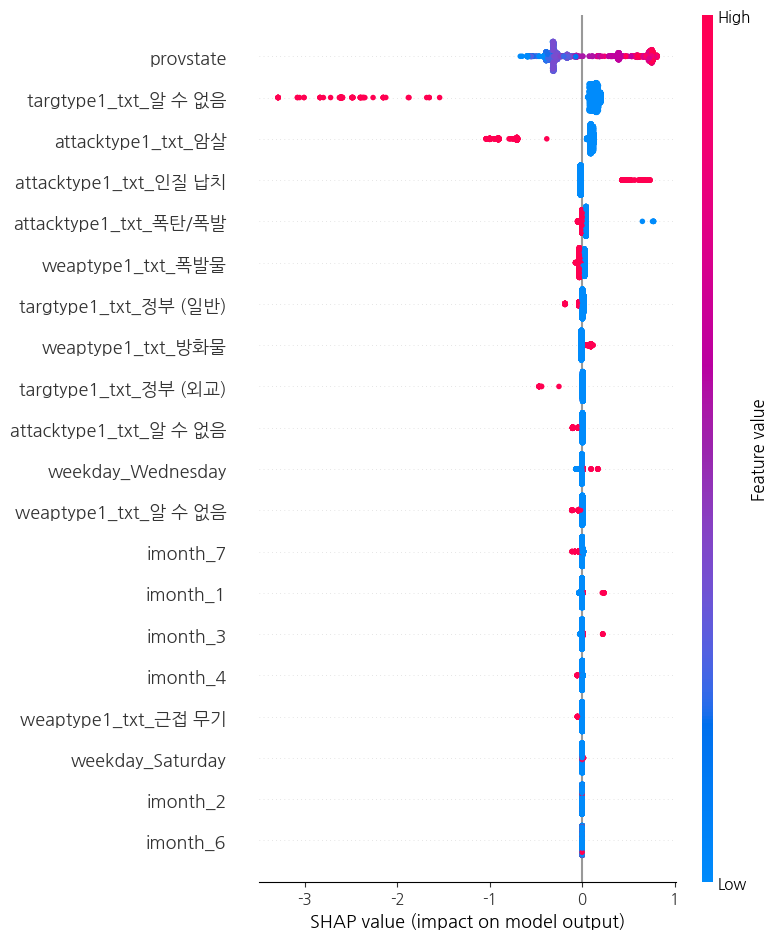

In [37]:
import shap
import joblib
import pandas as pd

# Î™®Îç∏ Î∞è Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
model = joblib.load("xgb_model.pkl")
X = pd.read_csv("X_train_encoded.csv")

# SHAP Ïã§Ìñâ
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)


<ipython-input-34-8e5edd6961b0>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


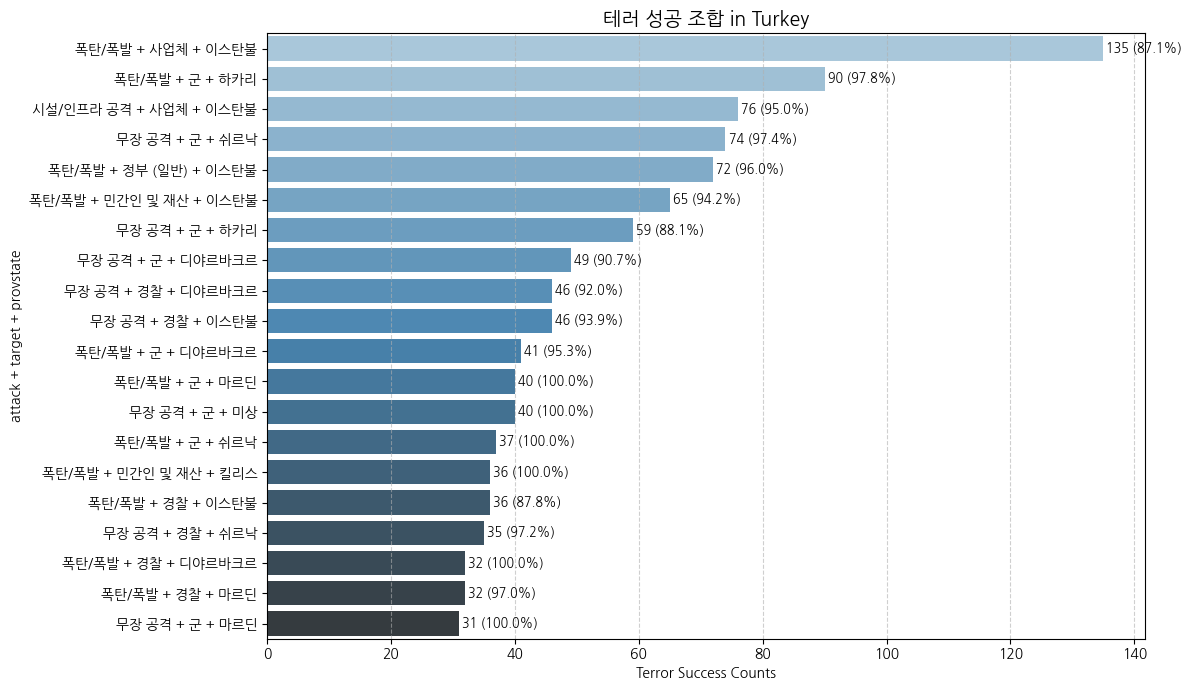

In [34]:
turkey_copy = terror_turkey.copy()

# ÌïÑÏöîÌïú Î≥ÄÏàò Ï∂îÏ∂ú
turkey_copy = turkey_copy[['attacktype1_txt', 'targtype1_txt', 'provstate', 'success']]

# Ï°∞Ìï© Í∑∏Î£π ÎßåÎì§Í∏∞
turkey_copy['combination'] = turkey_copy['attacktype1_txt'] + ' + ' + turkey_copy['targtype1_txt'] + ' + ' + turkey_copy['provstate']

# ÏÑ±Í≥µÎ•† Í≥ÑÏÇ∞
grouped = turkey_copy.groupby('combination')['success'].agg(['count', 'sum']).reset_index()
grouped['success_rate'] = (grouped['sum'] / grouped['count']) * 100

# ÏÉÅÏúÑ Ï°∞Ìï© Ï∂îÏ∂ú (Îç∞Ïù¥ÌÑ∞ Ïàò 10Í∞ú Ïù¥ÏÉÅ)
filtered = grouped[grouped['count'] >= 10]

# count Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨ (ÎÇ¥Î¶ºÏ∞®Ïàú), ÏÉÅÏúÑ 50Í∞ú Ï∂îÏ∂ú
top_combos = filtered.sort_values(by='sum', ascending=False).head(20)
top_combos
# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_combos,
    y='combination',
    x='sum',
    palette='Blues_d'
)
plt.title('ÌÖåÎü¨ ÏÑ±Í≥µ Ï°∞Ìï© in Turkey', fontsize=14)
plt.xlabel('Terror Success Counts')
plt.ylabel('attack + target + provstate')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# ÏàòÏπò ÎùºÎ≤® ÌëúÏãú (ÏÑ±Í≥µÌöüÏàò + ÏÑ±Í≥µÎ•†%)
for i, row in enumerate(top_combos.itertuples()):
    label = f"{int(row.sum)} ({row.success_rate:.1f}%)"
    plt.text(row.sum + 0.5, i, label, va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

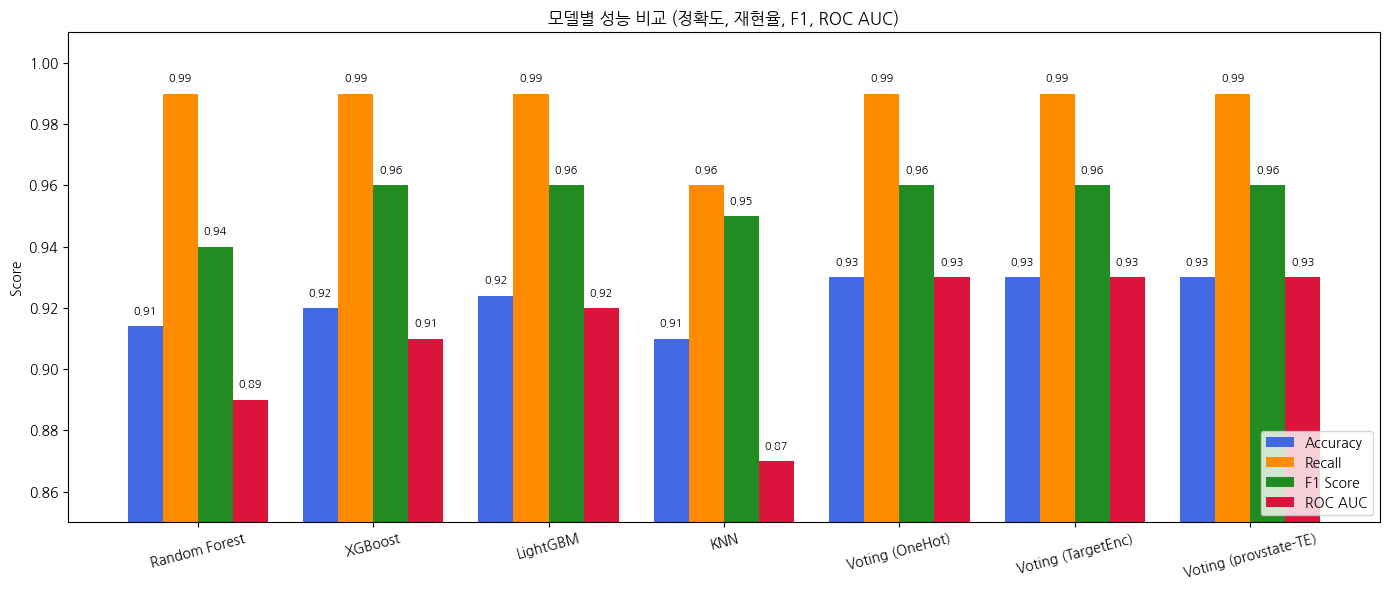

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# ÏõêÎ≥∏ Î¶¨Ïä§Ìä∏
model_names = [
    'Random Forest', 'XGBoost', 'LightGBM', 'KNN',
    'Voting (OneHot)', 'Voting (TargetEnc)', 'Voting (ÏµúÏ¢Ö)', 'Voting (provstate-TE)'
]

accuracies =   [0.914, 0.920, 0.924, 0.910, 0.930, 0.930, 0.930, 0.930]
recalls =      [0.99,  0.99,  0.99,  0.96,  0.99,  0.99,  0.99,  0.99 ]
f1_scores =    [0.94,  0.96,  0.96,  0.95,  0.96,  0.96,  0.96,  0.96 ]
roc_aucs =     [0.89,  0.91,  0.92,  0.87,  0.93,  0.93,  0.93,  0.93 ]

# 'Voting (ÏµúÏ¢Ö)'Ïùò Ïù∏Îç±Ïä§
remove_idx = model_names.index('Voting (ÏµúÏ¢Ö)')

# Ìï¥Îãπ Ïù∏Îç±Ïä§Î•º Í∞Å Î¶¨Ïä§Ìä∏ÏóêÏÑú Ï†úÍ±∞
model_names.pop(remove_idx)
accuracies.pop(remove_idx)
recalls.pop(remove_idx)
f1_scores.pop(remove_idx)
roc_aucs.pop(remove_idx)

# ÏãúÍ∞ÅÌôî
x = np.arange(len(model_names))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 6))
bar1 = ax.bar(x - 1.5*width, accuracies, width, label='Accuracy', color='royalblue')
bar2 = ax.bar(x - 0.5*width, recalls, width, label='Recall', color='darkorange')
bar3 = ax.bar(x + 0.5*width, f1_scores, width, label='F1 Score', color='forestgreen')
bar4 = ax.bar(x + 1.5*width, roc_aucs, width, label='ROC AUC', color='crimson')

ax.set_ylabel('Score')
ax.set_title('Î™®Îç∏Î≥Ñ ÏÑ±Îä• ÎπÑÍµê (Ï†ïÌôïÎèÑ, Ïû¨ÌòÑÏú®, F1, ROC AUC)')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=15)
ax.set_ylim(0.85, 1.01)
ax.legend(loc='lower right')

# ÏàòÏπò ÌëúÏãú
for i in range(len(model_names)):
    ax.annotate(f'{accuracies[i]:.2f}', xy=(x[i] - 1.5*width, accuracies[i] + 0.004), ha='center', fontsize=8)
    ax.annotate(f'{recalls[i]:.2f}',   xy=(x[i] - 0.5*width, recalls[i] + 0.004), ha='center', fontsize=8)
    ax.annotate(f'{f1_scores[i]:.2f}', xy=(x[i] + 0.5*width, f1_scores[i] + 0.004), ha='center', fontsize=8)
    ax.annotate(f'{roc_aucs[i]:.2f}',  xy=(x[i] + 1.5*width, roc_aucs[i] + 0.004), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# Í∞ÄÏÑ§ 1 : ÏãúÍ∞ÑÏóê ÌùêÎ¶ÑÏóê Îî∞Îùº Í∏∞Ïà†Ïùò Î∞úÏ†ÑÍ≥º ÎåÄÏùë Îß§Îâ¥Ïñº Íµ¨ÎπÑÎ°ú ÌÖåÎü¨ ÏÑ±Í≥µÎ•†Ïù¥ ÎÇÆÏïÑÏßà Í≤ÉÏù¥Îã§.

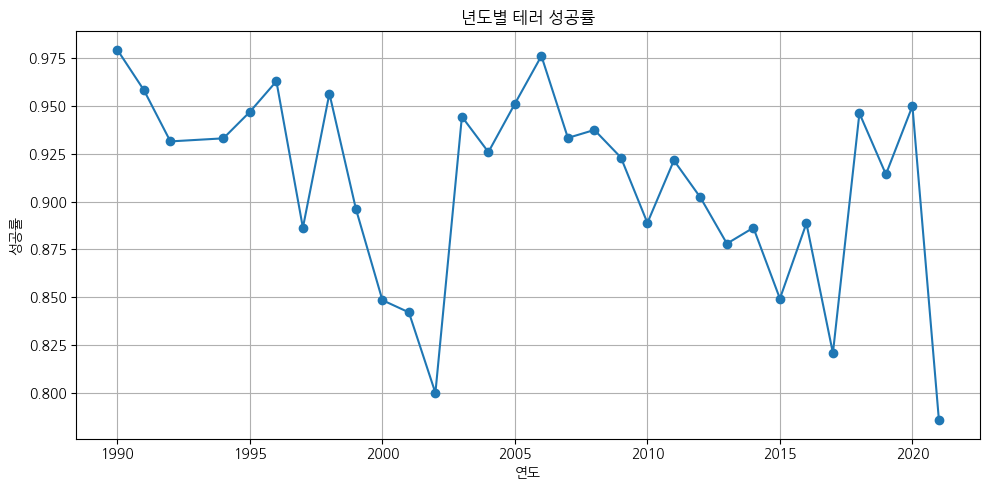

In [ ]:
# Í∞ÄÏÑ§ 1: ÏãúÍ∞Ñ ÌùêÎ¶ÑÏóê Îî∞Î•∏ ÌÖåÎü¨ ÏÑ±Í≥µÎ•† Î≥ÄÌôî
# Ïó∞ÎèÑÎ≥Ñ ÏÑ±Í≥µÎ•† Í≥ÑÏÇ∞
success_by_year = terror.groupby('iyear')['success'].mean()

# ÏãúÍ∞ÅÌôî - Ïó∞ÎèÑÎ≥Ñ ÏÑ±Í≥µÎ•† Î≥ÄÌôî
plt.figure(figsize=(10, 5))
success_by_year.plot(marker='o')
plt.title('ÎÖÑÎèÑÎ≥Ñ ÌÖåÎü¨ ÏÑ±Í≥µÎ•†')
plt.ylabel('ÏÑ±Í≥µÎ•†')
plt.xlabel('Ïó∞ÎèÑ')
plt.grid(True)
plt.tight_layout()
plt.show()



*   ÏãúÍ∞ÑÏù¥ ÌùêÎ¶ÑÏóê Îî∞Îùº ÏÑ±Í≥µÎ•†Ïù¥ ÎÇÆÏïÑÏßÄÎäî Í≤ÉÏùÑ ÌôïÏù∏
*   ÎÖÑÎèÑÎ≥Ñ Í≥µÍ≤©Ïú†ÌòïÏùÑ Î∂ÑÏÑù



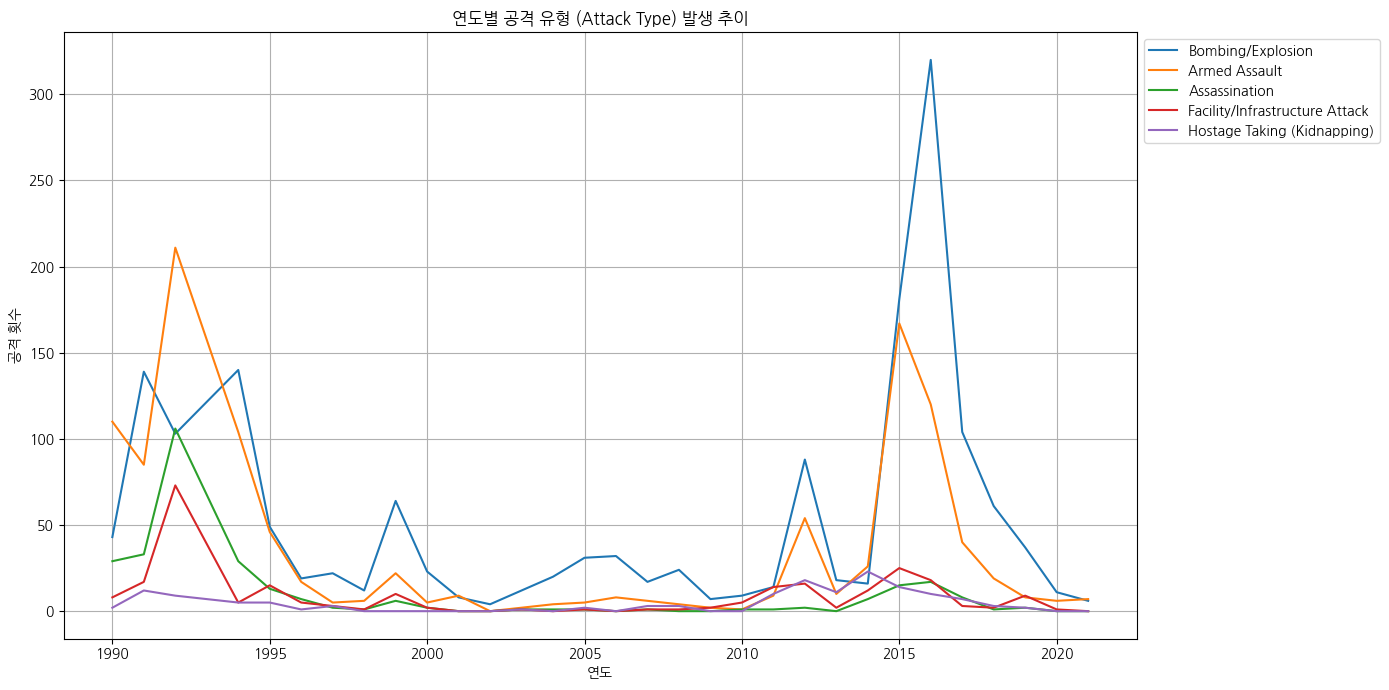

In [ ]:
# Ïó∞ÎèÑÎ≥Ñ attacktype1_txt Í±¥Ïàò ÏßëÍ≥Ñ
attack_count_by_year = terror.groupby(['iyear', 'attacktype1_txt']).size().unstack(fill_value=0)

# ÏÉÅÏúÑ Í≥µÍ≤©Ïú†ÌòïÎßå ÌïÑÌÑ∞ (Ï†ÑÏ≤¥ ÏàòÍ∞Ä ÎßéÏùÄ Ïú†Ìòï ÏúÑÏ£ºÎ°ú)
top_types = terror['attacktype1_txt'].value_counts().head(5).index.tolist()
attack_count_by_year_top = attack_count_by_year[top_types]

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.figure(figsize=(14, 7))
for column in attack_count_by_year_top.columns:
    plt.plot(attack_count_by_year_top.index, attack_count_by_year_top[column], label=column)

plt.title("Ïó∞ÎèÑÎ≥Ñ Í≥µÍ≤© Ïú†Ìòï (Attack Type) Î∞úÏÉù Ï∂îÏù¥")
plt.xlabel("Ïó∞ÎèÑ")
plt.ylabel("Í≥µÍ≤© ÌöüÏàò")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.grid(True)
plt.show()



*   ÎÖÑÎèÑÍ∞Ä ÏßÄÎÇ† ÏàòÎ°ù Ìè≠ÌÉÑ, Î¨¥Ïû•Í≥µÍ≤©, Ïù∏ÏßàÍ∑π Ïú†ÌòïÏùò Í≥µÍ≤©Ïù¥ Ï¶ùÍ∞ÄÌï®ÏùÑ ÌôïÏù∏
*   Í≥µÍ≤©Ïú†ÌòïÎ≥Ñ ÏÑ±Í≥µÎ•†ÏùÑ ÎÖÑÎèÑÏóê Îî∞Îùº Î∂ÑÏÑù



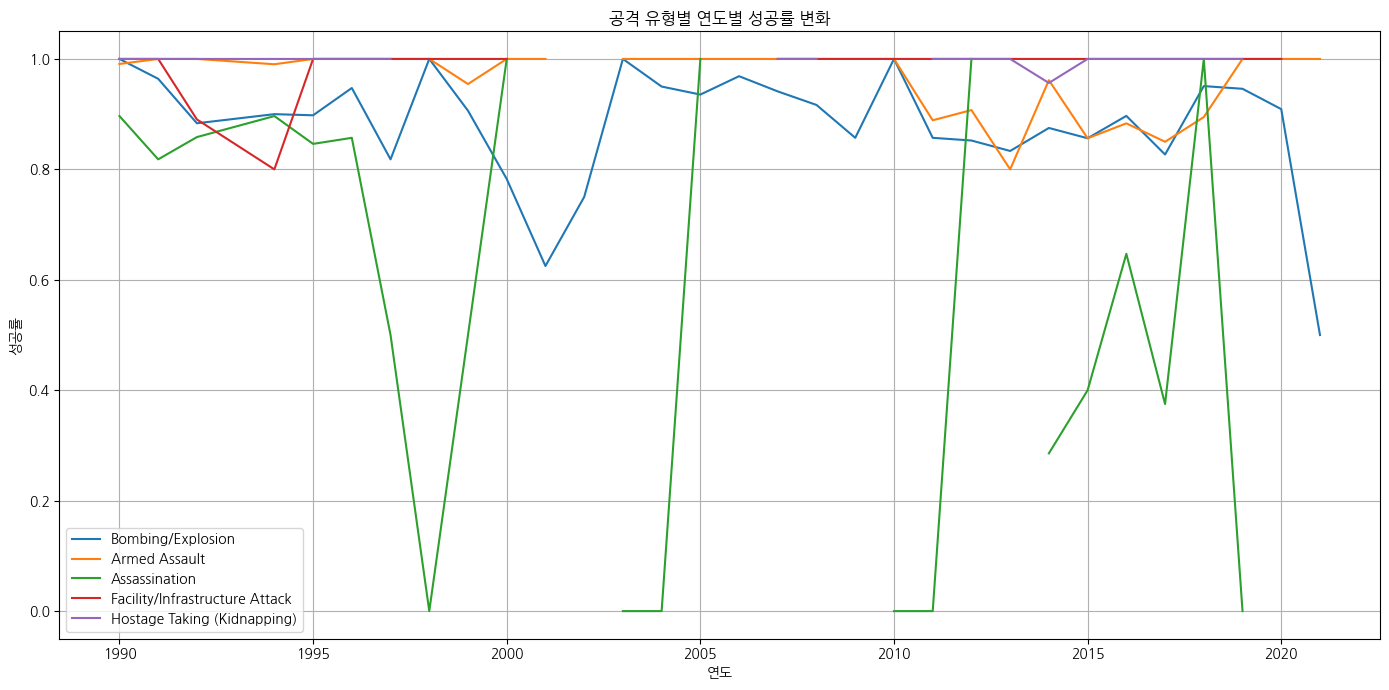

In [ ]:
# Ïó∞ÎèÑ-Í≥µÍ≤©Ïú†ÌòïÎ≥Ñ ÏÑ±Í≥µÎ•† Í≥ÑÏÇ∞
success_by_year_type = terror.groupby(['iyear', 'attacktype1_txt'])['success'].mean().unstack()

# ÏÉÅÏúÑ Í≥µÍ≤©Ïú†ÌòïÎßå ÌïÑÌÑ∞ (Ï†ÑÏ≤¥ ÏàòÍ∞Ä ÎßéÏùÄ Ïú†Ìòï ÏúÑÏ£ºÎ°ú)
top_types = terror['attacktype1_txt'].value_counts().head(5).index.tolist()
success_by_year_type_top = success_by_year_type[top_types]

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 7))
for col in success_by_year_type_top.columns:
    plt.plot(success_by_year_type_top.index, success_by_year_type_top[col], label=col)

plt.title("Í≥µÍ≤© Ïú†ÌòïÎ≥Ñ Ïó∞ÎèÑÎ≥Ñ ÏÑ±Í≥µÎ•† Î≥ÄÌôî")
plt.xlabel("Ïó∞ÎèÑ")
plt.ylabel("ÏÑ±Í≥µÎ•†")
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()



*   Ìè≠ÌÉÑ, Î¨¥Ïû•Í≥µÍ≤©, Ïù∏ÏßàÍ∑πÏùò ÏÑ±Í≥µÎ•†Ïù¥ Îñ®Ïñ¥ÏßÄÎäî Í≤ÉÏùÑ ÌôïÏù∏
*   Ìè≠ÌÉÑ, Î¨¥Ïû•Í≥µÍ≤©, Ïù∏ÏßàÍ∑πÏùò ÎπàÎèÑ ÏàòÍ∞Ä ÎßéÏïÑÏßÄÎäî Í≤ÉÍ≥º Î∞òÎåÄÎ°ú ÏÑ±Í≥µÎ•†ÏùÄ ÎÇÆÏïÑÏßÄÍ≥† ÏûàÏñ¥ Ï†ÑÏ≤¥Ï†ÅÏù∏ ÏÑ±Í≥µÎ•†Ïù¥ ÎÇÆÏïÑÏßÑÎã§Í≥† Î≥º Ïàò ÏûàÎã§.




1.   ÏãúÎØºÎì§Ïùò Í≤ΩÍ∞ÅÏã¨ ÏÉÅÏäπÏúºÎ°ú Ìà¨Ï≤†Ìïú Ïã†Í≥†Ï†ïÏã†Ïù¥ Î∞úÎã¨Ìï®
2.   Í≥µÌï≠, Í∏∞Ï∞®Ïó≠, ÎåÄÌòï ÌñâÏÇ¨Ïû• Îì± Ï£ºÏöî ÏãúÏÑ§Ïùò Í≤ÄÏÉâ ÏãúÏä§ÌÖúÏù¥ Í≥†ÎèÑÌôîÎêòÏñ¥ X-ray, ÌôîÌïô ÏÑºÏÑú, AI Í∏∞Î∞ò CCTV Îì±ÏúºÎ°ú Ìè≠Î∞úÎ¨º ÌÉêÏßÄÍ∞Ä Îπ®ÎùºÏßê.











*   Í∞ÄÏÑ§ 1:
"ÏãúÍ∞ÑÏù¥ ÌùêÎ•ºÏàòÎ°ù ÌÖåÎü¨ ÏÑ±Í≥µÎ•†Ïù¥ ÎÇÆÏïÑÏßà Í≤ÉÏù¥Îã§."
‚Üí ÏÇ¨Ïö©Ìïú Í∏∞Î≤ï: ÏÑ†Ìòï ÌöåÍ∑Ä Î∂ÑÏÑù (Linear Regression)
*   Ïù¥Ïú†:

1.   ÏãúÍ∞ÑÏùÄ Ïó∞ÏÜçÌòï ÎèÖÎ¶ΩÎ≥ÄÏàò
2.   ÏÑ±Í≥µÎ•†ÏùÄ Ïó∞ÏÜçÌòï Ï¢ÖÏÜçÎ≥ÄÏàò
3.   Ï¶â, X(Ïó∞ÎèÑ)Í∞Ä Ï¶ùÍ∞ÄÌï®Ïóê Îî∞Îùº Y(ÏÑ±Í≥µÎ•†)Ïù¥ Î≥ÄÌïòÎäîÏßÄ ÌôïÏù∏ÌïòÍ≥† Ïã∂ÏùÄ Í≤É
‚Üí Ïù¥Îü¥ Îïê ÏÑ†Ìòï ÌöåÍ∑ÄÍ∞Ä Í∞ÄÏû• Ï†ÅÏ†à


*   ÏùòÎ¨∏Ï†ê


1.   ÏãúÍ∞ÑÏù¥ ÌùêÎ•ºÏàòÎ°ù ÏÑ±Í≥µÎ•†Ïù¥ Í∞êÏÜå(Í∏∞Ïö∏Í∏∞ < 0)ÌïòÎäîÍ∞Ä?
2.   Ïù¥ Í¥ÄÍ≥ÑÍ∞Ä Ïö∞Ïó∞Ïù∏ÏßÄ ÏïÑÎãåÏßÄ(p-value) ÌôïÏù∏








In [ ]:
from scipy.stats import linregress

# Ïó∞ÎèÑÎ≥Ñ ÏÑ±Í≥µÎ•† Í≥ÑÏÇ∞
success_by_year = terror.groupby('iyear')['success'].mean().reset_index()

# ÏÑ†Ìòï ÌöåÍ∑Ä (ÏãúÍ∞ÑÏùò ÌùêÎ¶ÑÍ≥º ÏÑ±Í≥µÎ•† Í∞Ñ Í¥ÄÍ≥Ñ)
slope, intercept, r_value, p_value, std_err = linregress(success_by_year['iyear'], success_by_year['success'])

print("Í∏∞Ïö∏Í∏∞ (slope):", slope)  # ÏùåÏàòÎ©¥ ÏÑ±Í≥µÎ•† Í∞êÏÜå
print("p-value:", p_value)       # Ïú†ÏùòÏàòÏ§Ä ÌôïÏù∏
print("Í≤∞Ï†ïÍ≥ÑÏàò (R¬≤):", r_value**2)


Í∏∞Ïö∏Í∏∞ (slope): -0.0025087449773147303
p-value: 0.0007837861779585792
Í≤∞Ï†ïÍ≥ÑÏàò (R¬≤): 0.3266391774483297


# Í∞ÄÏÑ§ 2 : Ï¢ÖÍµêÏóê Îî∞Î•∏ ÌÖåÎü¨ ÏúÑÌóòÏÑ±

4Ï†êÎ∂ÄÌÑ∞ ÏúÑÌóòÍµ∞Ïóê ÏÜçÌïúÎã§


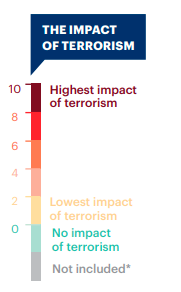


In [20]:
# GTI score(Íµ≠Í∞ÄÎ≥Ñ ÌÖåÎü¨ ÏúÑÌóòÎèÑ Îç∞Ïù¥ÌÑ∞)
GTI_rank = pd.read_csv('/content/gti_2016_rank_1_to_130_complete.csv')

In [21]:
# GTI_scoreÍ∞Ä 4 Ïù¥ÏÉÅÏù∏ Íµ≠Í∞ÄÎì§ Ï†ïÎ¶¨
high_GTI = GTI_rank[GTI_rank["GTI_Score"] >= 4].reset_index(drop=True)

In [22]:
# ÎÇòÎùºÎ≥Ñ Ï¢ÖÍµê Îç∞Ïù¥ÌÑ∞
religion = pd.read_csv('/content/flags.csv', sep=";")

In [23]:
religion = religion[["name", "religion"]].copy()
religion.rename(columns={"name": "Country"}, inplace=True)

In [24]:
# Ï¢ÖÍµê ÏΩîÎìú Îß§Ìïë ÎîïÏÖîÎÑàÎ¶¨
religion_map = {
    0: "Catholic",
    1: "Other Christian",
    2: "Muslim",
    3: "Buddhist",
    4: "Hindu",
    5: "Ethnic",
    6: "Marxist",
    7: "Others"
}

religion["religion"] = religion["religion"].map(religion_map)
religion

Country         religion
0       Afghanistan           Muslim
1           Albania          Marxist
2           Algeria           Muslim
3    American-Samoa  Other Christian
4           Andorra         Catholic
..              ...              ...
188   Western-Samoa  Other Christian
189      Yugoslavia          Marxist
190           Zaire           Ethnic
191          Zambia           Ethnic
192        Zimbabwe           Ethnic

[193 rows x 2 columns]

In [25]:
# Î®ºÏ†Ä Íµ≠Í∞ÄÎ™ÖÏù¥ ÏùºÏπòÌïòÎäî Í≤ÉÎßå Î≥ëÌï©
merged_religion_gti = pd.merge(high_GTI, religion, on="Country", how="left")


# Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
merged_religion_gti.loc[5, "religion"] = "Muslim"
merged_religion_gti.loc[10, "religion"] = "Other Christian"
merged_religion_gti.loc[18, "religion"] = "Other Christian"
merged_religion_gti.loc[25, "religion"] = "Muslim"
merged_religion_gti.loc[27, "religion"] = "Other Christian"
merged_religion_gti.loc[29, "religion"] = "Muslim"
merged_religion_gti.loc[31, "religion"] = "Other Christian"
merged_religion_gti.loc[33, "religion"] = "Other Christian"
merged_religion_gti.loc[38, "religion"] = "Catholic"
merged_religion_gti.loc[42, "religion"] = "Buddhist"

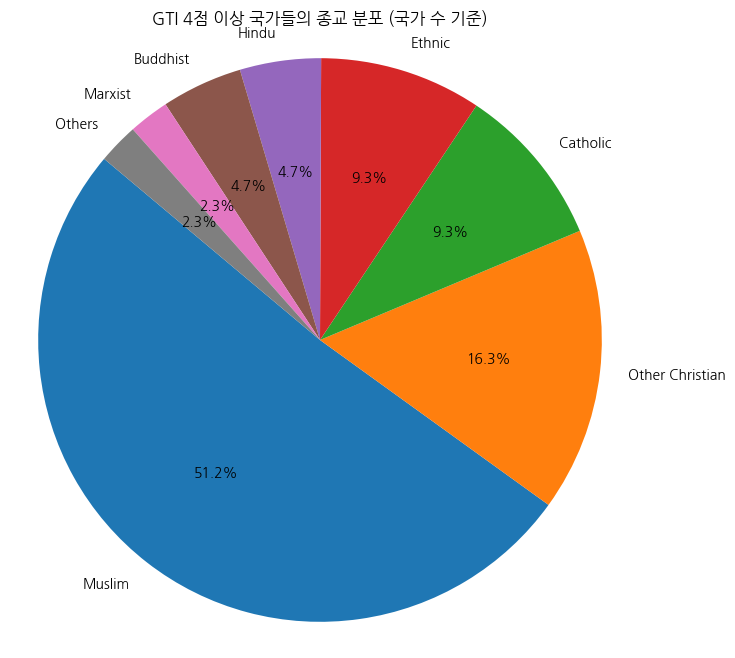

In [26]:
# Ï¢ÖÍµêÎ≥Ñ Íµ≠Í∞Ä Ïàò
religion_counts = merged_religion_gti["religion"].value_counts()

# ÌååÏù¥Ï∞®Ìä∏ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 8))
plt.pie(religion_counts, labels=religion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("GTI 4Ï†ê Ïù¥ÏÉÅ Íµ≠Í∞ÄÎì§Ïùò Ï¢ÖÍµê Î∂ÑÌè¨ (Íµ≠Í∞Ä Ïàò Í∏∞Ï§Ä)")
plt.axis("equal")
plt.show()

ÏúÑÌóòÎèÑÍ∞Ä 4Ï†ê Ïù¥ÏÉÅÏù∏ Íµ≠Í∞ÄÎì§ Ï§ë Ï†àÎ∞òÏù¥ ÎÑòÎäî 51.2%Í∞Ä Î¨¥Ïä¨Î¶º Íµ≠Í∞ÄÏù¥Îã§. Í∑∏ Îí§Î•º Ïù¥Ïñ¥ ÎØºÏ°±Ï¢ÖÍµê, Ïπ¥ÌÜ®Î¶≠ Îì±Ïù¥ 12.1%, 9.1%Î•º Ï∞®ÏßÄÌïòÏòÄÎã§

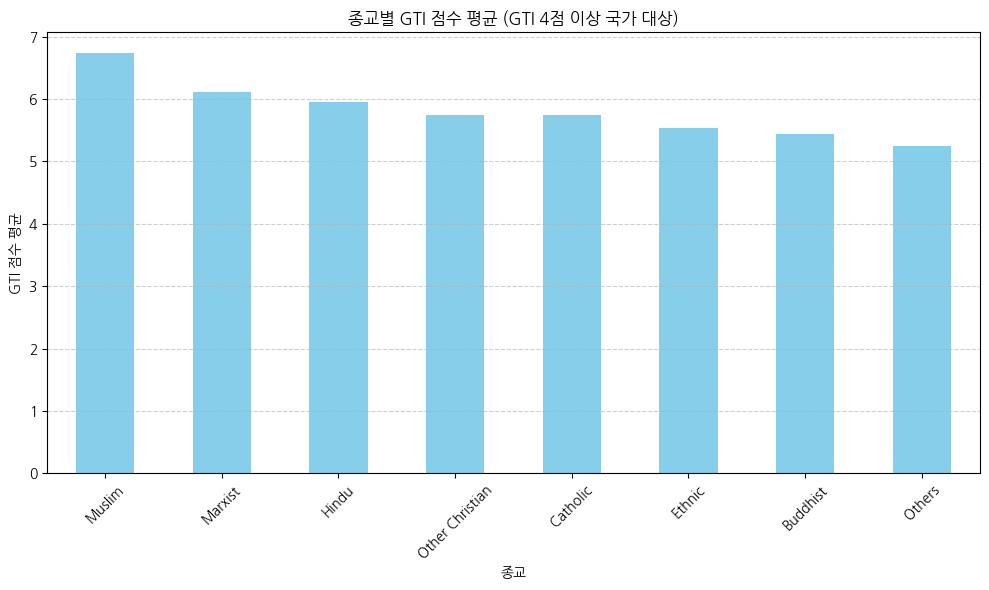

In [27]:
# Ï¢ÖÍµêÎ≥Ñ GTI Ï†êÏàò ÌèâÍ∑† Í≥ÑÏÇ∞
avg_gti_by_religion = merged_religion_gti.groupby("religion")["GTI_Score"].mean().sort_values(ascending=False)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
avg_gti_by_religion.plot(kind="bar", color="skyblue")
plt.title("Ï¢ÖÍµêÎ≥Ñ GTI Ï†êÏàò ÌèâÍ∑† (GTI 4Ï†ê Ïù¥ÏÉÅ Íµ≠Í∞Ä ÎåÄÏÉÅ)")
plt.xlabel("Ï¢ÖÍµê")
plt.ylabel("GTI Ï†êÏàò ÌèâÍ∑†")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [28]:
terror_top_20 = terror["Country"].value_counts().head(20).reset_index()
terror_top_20.columns = ["Country", "Terror_Attacks"]

In [32]:
top_20_with_religion = pd.merge(terror_top_20, religion, on="Country", how="left")

top_20_with_religion

Country  Terror_Attacks  religion
0                       Iraq           26195    Muslim
1                Afghanistan           19923    Muslim
2                   Pakistan           15006    Muslim
3                      India           12658     Hindu
4                Philippines            7273  Catholic
5                      Yemen            6083       NaN
6                    Nigeria            5804    Muslim
7                   Colombia            5433  Catholic
8                    Somalia            5317    Muslim
9                   Thailand            3892  Buddhist
10                    Turkey            3602    Muslim
11                     Syria            2787    Muslim
12                   Algeria            2742    Muslim
13            United Kingdom            2534       NaN
14                     Egypt            2510    Muslim
15                     Libya            2372    Muslim
16  West Bank and Gaza Strip            2286       NaN
17                    Russia            2223       NaN
18                      Peru            1817  Catholic
19                   Ukraine            1728       NaN

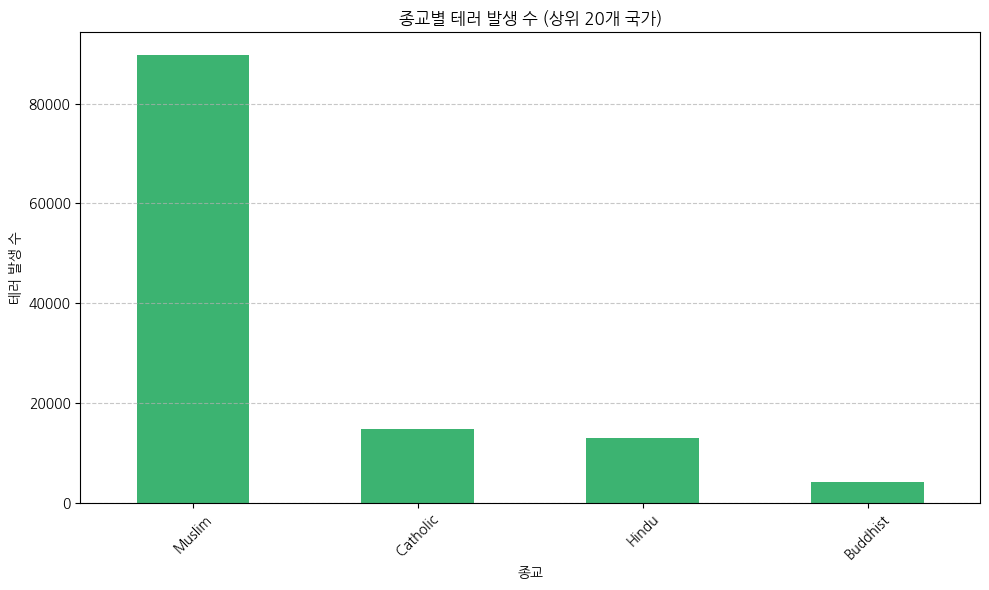

In [ ]:
# ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt

terror_by_religion_updated = top_20_with_religion.groupby("religion")["Terror_Attacks"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
terror_by_religion_updated.plot(kind="bar", color="mediumseagreen")
plt.title("Ï¢ÖÍµêÎ≥Ñ ÌÖåÎü¨ Î∞úÏÉù Ïàò (ÏÉÅÏúÑ 20Í∞ú Íµ≠Í∞Ä)")
plt.xlabel("Ï¢ÖÍµê")
plt.ylabel("ÌÖåÎü¨ Î∞úÏÉù Ïàò")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



*   GTI-socreÍ∞Ä ÏïÑÎãå Ïã§Ï†ú ÌÖåÎü¨ ÏàòÏôÄ ÎπÑÍµêÌï¥Î¥êÎèÑ Î¨¥Ïä¨Î¶ºÏù¥ ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎßéÏùÄ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
*   ÌïòÏßÄÎßå Í∑∏Î†áÎã§Í≥† Î¨¥Ïä¨Î¶ºÏù¥ ÌÖåÎü¨Î•º Ï¢ÖÏö©ÌïòÎäî Ï¢ÖÍµêÎùºÍ±∞ÎÇò ÏûòÎ™ªÎêú Ïã†ÎÖêÏù¥ÎùºÎäî ÎúªÏùÄ ÏïÑÎãàÎã§.


1.   Ï≤´ Ïß∏Î°ú, Î¨¥Ïä¨Î¶º Íµ≠Í∞Ä Ï§ë ÌèâÌôîÎ°úÏö¥ ÎÇòÎùºÍ∞Ä ÎåÄÎã§ÏàòÏù¥Îã§.(Ïù∏ÎèÑÎÑ§ÏãúÏïÑ, ÎßêÎ†àÏù¥ÏãúÏïÑ, Î™®Î°úÏΩî Îì±)
2.   ÎëêÎ≤àÏß∏Î°ú, ÏßÄÏ†ïÌïôÏ†Å Î∂ÑÏüÅ, Ï†ïÍ∂åÏùò Î∂àÏïàÏ†ïÏúºÎ°ú Ïù∏Ìïú ÌÖåÎü¨Í∞Ä Îã§ÏàòÏù¥Îã§.(Ïù¥ÎùºÌÅ¨, ÏãúÎ¶¨ÏïÑ, ÏòàÎ©ò, ÏïÑÌîÑÍ∞ÄÎãàÏä§ÌÉÑ Îì±)







*   Í∞ÄÏÑ§ 2:
"Ï¢ÖÍµêÏóê Îî∞Îùº ÌÖåÎü¨ ÏúÑÌóòÏÑ±Ïù¥ Îã§Î•¥Îã§."
‚Üí ÏÇ¨Ïö©Ìïú Í∏∞Î≤ï: ÏùºÏõê Î∂ÑÏÇ∞ Î∂ÑÏÑù (One-way ANOVA)
*   Ïù¥Ïú†:

1.   Ï¢ÖÍµêÎäî Î≤îÏ£ºÌòï ÎèÖÎ¶ΩÎ≥ÄÏàò
2.   ÌÖåÎü¨ ÏúÑÌóòÏÑ±ÏùÄ Ïó∞ÏÜçÌòï Ï¢ÖÏÜçÎ≥ÄÏàò
3.   ÏÑúÎ°ú Îã§Î•∏ Í∑∏Î£π(Ï¢ÖÍµê ÏßëÎã®) Í∞ÑÏóê ÌèâÍ∑†Ïùò Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄÎ•º Î≥¥Í≥† Ïã∂ÏùÄ Í≤É
‚Üí Ïù¥Îü¥ Îïê ANOVA(Î∂ÑÏÇ∞ Î∂ÑÏÑù)Ïù¥ Ï†ÅÏ†à


*   ÌïµÏã¨ ÏßàÎ¨∏


1.   Ï¢ÖÍµêÎ≥ÑÎ°ú ÌÖåÎü¨ ÏúÑÌóò ÏàòÏ§Ä ÌèâÍ∑†Ïù¥ Îã§Î•¥Îã§Í≥† Î≥º Ïàò ÏûàÎäîÍ∞Ä?
2.   p-value < 0.05Î©¥ Ï∞®Ïù¥Í∞Ä "ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†Ïùò"ÌïòÎã§Í≥† Ìï¥ÏÑù








In [34]:
# 1. GTIÏôÄ Ï¢ÖÍµê Ï†ïÎ≥¥ Î≥ëÌï©
merged = pd.merge(GTI_rank, religion, on ='Country',  how='inner')

# 2. Ï¢ÖÍµêÎ≥Ñ GTI Ï†êÏàò Í∑∏Î£π ÎÇòÎàÑÍ∏∞ (Ïª¨ÎüºÎ™Ö Î∞òÎìúÏãú ÌôïÏù∏!)
groups = merged.groupby('religion')['GTI_Score'].apply(list)

# 3. ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù (ANOVA)
from scipy.stats import f_oneway
anova_result = f_oneway(*groups)

# 4. Í≤∞Í≥º Ï∂úÎ†•
print("F ÌÜµÍ≥ÑÎüâ:", anova_result.statistic)
print("p-value:", anova_result.pvalue)


F ÌÜµÍ≥ÑÎüâ: 3.806248988935099
p-value: 0.0014150065776272378


In [35]:
terror_with_religion = pd.merge(terror, religion, on="Country", how="left")

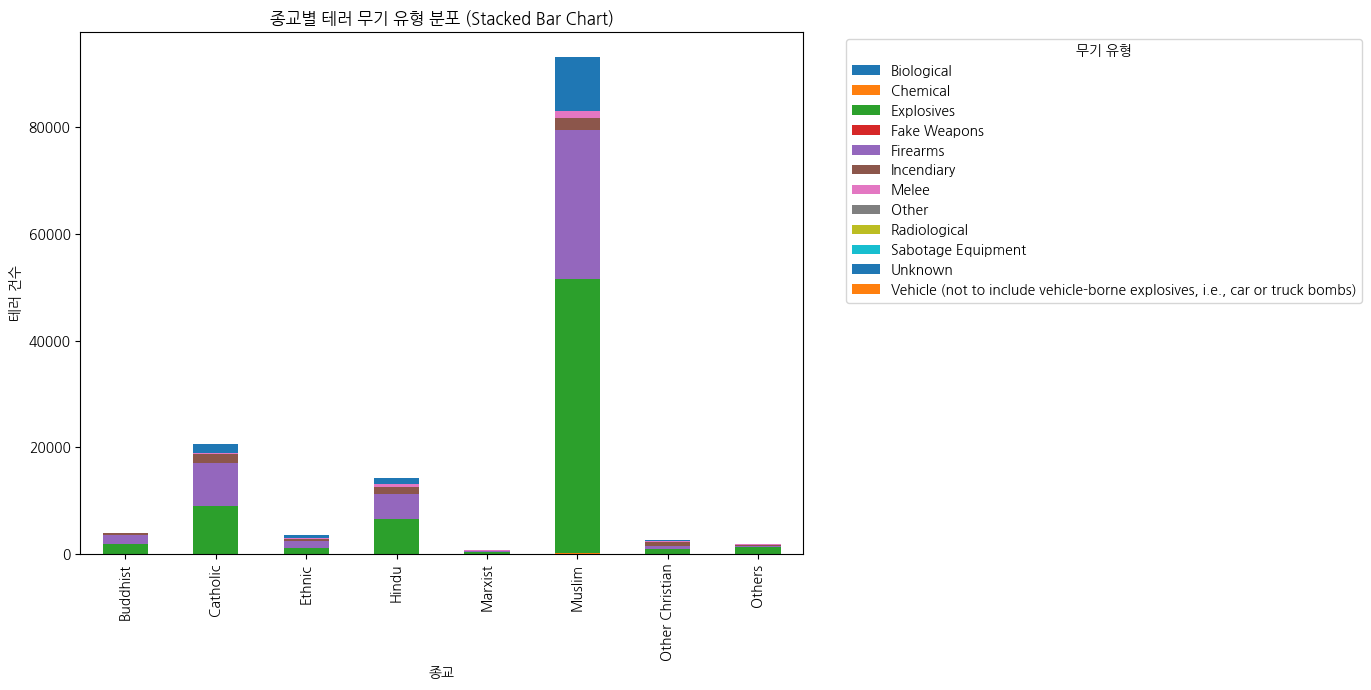

In [36]:
# NaN ÏóÜÎäî ÌñâÎßå ÌïÑÌÑ∞ÎßÅ
filtered_df = terror_with_religion.dropna(subset=["religion", "weaptype1_txt"])

# Ï¢ÖÍµêÎ≥Ñ Î¨¥Í∏∞ Ïú†Ìòï ÏßëÍ≥Ñ
grouped = (
    filtered_df
    .groupby(['religion', 'weaptype1_txt'])
    .size()
    .reset_index(name='Count')
)

# ÌîºÎ≤ó ÌÖåÏù¥Î∏îÎ°ú Î≥ÄÌôò
pivot_df = (
    grouped
    .pivot(index='religion', columns='weaptype1_txt', values='Count')
    .fillna(0)
)

# Stacked Bar Chart
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title("Ï¢ÖÍµêÎ≥Ñ ÌÖåÎü¨ Î¨¥Í∏∞ Ïú†Ìòï Î∂ÑÌè¨ (Stacked Bar Chart)")
plt.xlabel("Ï¢ÖÍµê")
plt.ylabel("ÌÖåÎü¨ Í±¥Ïàò")
plt.legend(title="Î¨¥Í∏∞ Ïú†Ìòï", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Ï¢ÖÍµêÏôÄ Î¨¥Í∏∞ Ï†ïÎ≥¥Í∞Ä ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
filtered_df = terror_with_religion.dropna(subset=["religion", "weaptype1_txt"])

# Í∑∏Î£πÌôî: Ï¢ÖÍµêÎ≥Ñ Î¨¥Í∏∞ Ïú†Ìòï Ïàò
grouped = (
    filtered_df
    .groupby(['religion', 'weaptype1_txt'])
    .size()
    .reset_index(name='Count')
)

# Ï¢ÖÍµêÎ≥Ñ Ï¥ù ÌÖåÎü¨ Ïàò
total_by_religion = grouped.groupby('religion')['Count'].sum().reset_index(name='Total')

# ÎπÑÏú® Í≥ÑÏÇ∞ÏùÑ ÏúÑÌï¥ Î≥ëÌï©
grouped_with_total = pd.merge(grouped, total_by_religion, on='religion')
grouped_with_total['Percent'] = (grouped_with_total['Count'] / grouped_with_total['Total']) * 100

# Ï¢ÖÍµêÎ≥Ñ ÏÉÅÏúÑ 3Í∞ú Î¨¥Í∏∞ Ïú†Ìòï Ï∂îÏ∂ú
top1_weapons_by_religion = (
    grouped_with_total
    .sort_values(['religion', 'Percent'], ascending=[True, False])
    .groupby('religion')
    .head(2)
    .reset_index(drop=True)
)

top1_weapons_by_religion

religion weaptype1_txt  Count  Total    Percent
0          Buddhist    Explosives   1902   3953  48.115355
1          Buddhist      Firearms   1660   3953  41.993423
2          Catholic    Explosives   8970  20619  43.503565
3          Catholic      Firearms   8118  20619  39.371454
4            Ethnic      Firearms   1431   3484  41.073479
5            Ethnic    Explosives   1071   3484  30.740528
6             Hindu    Explosives   6484  14185  45.710257
7             Hindu      Firearms   4689  14185  33.056045
8           Marxist    Explosives    406    760  53.421053
9           Marxist      Firearms    161    760  21.184211
10           Muslim    Explosives  51481  93164  55.258469
11           Muslim      Firearms  27800  93164  29.839852
12  Other Christian    Explosives    918   2708  33.899557
13  Other Christian    Incendiary    722   2708  26.661743
14           Others    Explosives   1307   1936  67.510331
15           Others    Incendiary    205   1936  10.588843

# Í∞ÄÏÑ§ 3 : Ï¢ÖÍµê Î≥Ñ Ï£ºÏöî Í≥µÍ≤© ÎåÄÏÉÅÏù¥ Îã§Î•º Í≤ÉÏù¥Îã§.

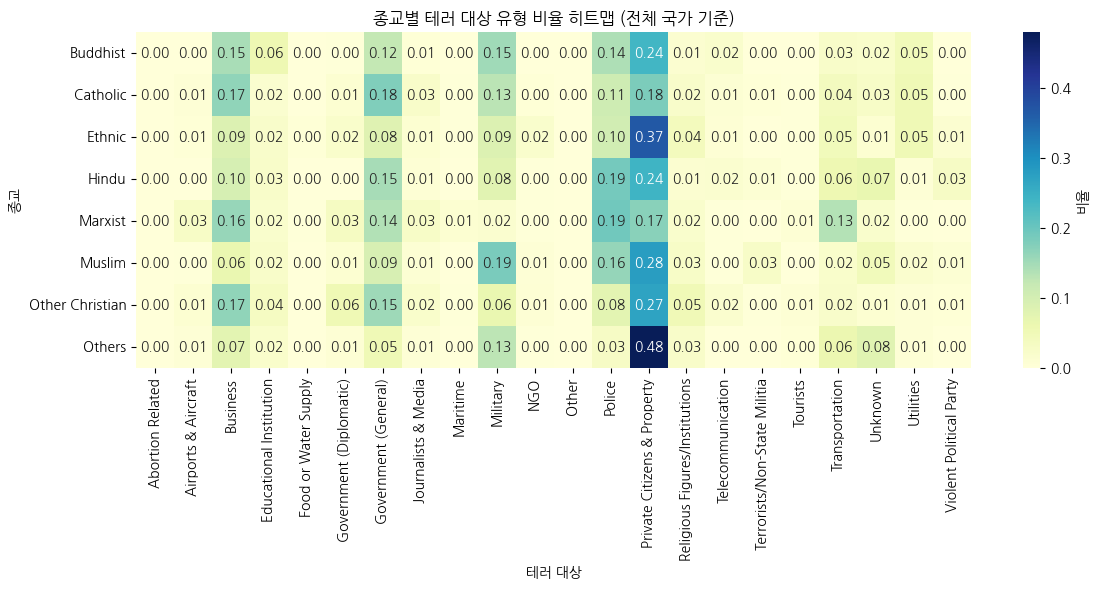

In [ ]:
# Ï†ÑÏ≤¥ Íµ≠Í∞Ä ÎåÄÏÉÅ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌÉÄÍπÉÍ≥º Íµ≠Í∞Ä Ï∂îÏ∂ú
all_country_targets = terror[["Country", "targtype1_txt"]].copy()


# Íµ≠Í∞Ä Ïù¥Î¶Ñ Í∏∞Ï§Ä Î≥ëÌï©
all_country_targets = pd.merge(all_country_targets, religion, on="Country", how="left")

# Ï¢ÖÍµêÎ≥Ñ ÌÉÄÍπÉ Ïú†Ìòï Î∂ÑÌè¨ Í≥ÑÏÇ∞
full_religion_target_dist = all_country_targets.groupby(["religion", "targtype1_txt"]).size().unstack(fill_value=0)

# ÎπÑÏú®Î°ú ÌôòÏÇ∞
full_religion_target_ratio = full_religion_target_dist.div(full_religion_target_dist.sum(axis=1), axis=0)

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(full_religion_target_ratio, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'ÎπÑÏú®'})
plt.title("Ï¢ÖÍµêÎ≥Ñ ÌÖåÎü¨ ÎåÄÏÉÅ Ïú†Ìòï ÎπÑÏú® ÌûàÌä∏Îßµ (Ï†ÑÏ≤¥ Íµ≠Í∞Ä Í∏∞Ï§Ä)")
plt.xlabel("ÌÖåÎü¨ ÎåÄÏÉÅ")
plt.ylabel("Ï¢ÖÍµê")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



1. ÎåÄÎ∂ÄÎ∂ÑÏùò Ï¢ÖÍµêÍ∂åÏóêÏÑú ÎØºÍ∞ÑÏù∏(Private Citizens & Property)**Ïù¥ Í∞ÄÏû• Ï£ºÏöîÌïú ÌÖåÎü¨ ÎåÄÏÉÅÏù¥ÏóàÎã§.
2. Business(ÏÇ¨ÏóÖÏ≤¥)ÏôÄ Police(Í≤ΩÏ∞∞)ÎèÑ ÏùºÎ∂Ä Ï¢ÖÍµêÍ∂åÏóêÏÑú ÎÜíÏùÄ ÎπÑÏ§ëÏùÑ Ï∞®ÏßÄÌñàÎã§.
3. Muslim, Catholic, Other Christian Íµ≠Í∞ÄÎì§ÏóêÏÑúÎäî ÌÉÄÍπÉ Ïú†ÌòïÏù¥ ÎπÑÍµêÏ†Å Îã§ÏñëÌïòÍ≤å Î∂ÑÌè¨ÎêòÏóàÎã§.
4. Hindu, Buddhist, Ethnic Íµ≠Í∞ÄÎì§ÏùÄ ÎØºÍ∞ÑÏù∏ Í≥µÍ≤©Ïóê ÏßëÏ§ëÎêú Í≤ΩÌñ•Ïù¥ ÎöúÎ†∑ÌñàÎã§.
5. Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÏÇ¨Ìöå ÌòºÎûÄÍ≥º Í≥µÌè¨ Ï°∞ÏÑ±ÏùÑ ÏúÑÌïú ÎØºÍ∞ÑÏù∏ Í≥µÍ≤©Ïù¥ Í∞ÄÏû• ÏùºÎ∞òÏ†ÅÏù∏ Ï†ÑÎûµÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.










*   Í∞ÄÏÑ§ 3:
"Ï¢ÖÍµêÎ≥ÑÎ°ú ÌÖåÎü¨Ïùò Í≥µÍ≤© ÎåÄÏÉÅÏù¥ Îã§Î•¥Îã§."
‚Üí ÏÇ¨Ïö©Ìïú Í∏∞Î≤ï: Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï (Chi-squared test of independence)
*   Ïù¥Ïú†:

1.   Ï¢ÖÍµê: Î≤îÏ£ºÌòï Î≥ÄÏàò
2.   Í≥µÍ≤© ÎåÄÏÉÅ: Î≤îÏ£ºÌòï Î≥ÄÏàò
3.   Îëê Î≤îÏ£ºÌòï Î≥ÄÏàò Í∞ÑÏóê Ïó∞Í¥ÄÏÑ±/ÎèÖÎ¶ΩÏÑ±ÏùÑ Î≥¥Í≥† Ïã∂ÏùÄ Í≤É
‚Üí Ïù¥Îü¥ Îïê Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏù¥ Ï†ÅÌï©

*   ÌïµÏã¨ ÏßàÎ¨∏


1.   Ï¢ÖÍµêÏóê Îî∞Îùº Í≥µÍ≤© ÎåÄÏÉÅÏùò Î∂ÑÌè¨Í∞Ä Ïú†ÏùòÎØ∏ÌïòÍ≤å Îã§Î•∏Í∞Ä?
2.   p-value < 0.05Î©¥ ÎèÖÎ¶ΩÏù¥ ÏïÑÎãò ‚Üí Ï¢ÖÍµêÏôÄ Í≥µÍ≤© ÎåÄÏÉÅÏù¥ Í¥ÄÎ†® ÏûàÏùå









In [ ]:
# terror_dfÏóê Íµ≠Í∞ÄÎ≥Ñ Ï¢ÖÍµê Ï†ïÎ≥¥ Î∂ôÏù¥Í∏∞ ‚Üí Íµ≠Í∞ÄÎ™Ö Í∏∞Ï§Ä Î≥ëÌï©
terror_with_religion = pd.merge(
    terror,
    religion[['Country', 'religion']],  # Ï¢ÖÍµê Ïª¨ÎüºÎ™ÖÏù¥ 'religion'Ïù¥ÎùºÍ≥† Í∞ÄÏ†ï
    on='Country',
    how='left'  # Î™®Îì† ÌÖåÎü¨ ÏÇ¨Í±¥ Ïú†ÏßÄ, Ï¢ÖÍµê Ï†ïÎ≥¥ ÏóÜÎäî Í≤ΩÏö∞Îäî NaN
)


In [ ]:
from scipy.stats import chi2_contingency

# Ï¢ÖÍµêÎ≥Ñ Í≥µÍ≤© ÎåÄÏÉÅ ÍµêÏ∞®Ìëú
cross_tab = pd.crosstab(terror_with_religion['religion'], terror_with_religion['targtype1_txt'])

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
chi2, p, dof, expected = chi2_contingency(cross_tab)

print("Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ:", chi2)
print("ÏûêÏú†ÎèÑ:", dof)
print("p-value:", p)  # p < 0.05Î©¥ Ï¢ÖÍµêÎ≥Ñ Í≥µÍ≤© ÎåÄÏÉÅ Î∂ÑÌè¨ Ï∞®Ïù¥ ÏûàÏùå


Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 15264.509314322371
ÏûêÏú†ÎèÑ: 147
p-value: 0.0


# Í∞ÄÏÑ§ 4 : ÏàòÏö© ÎÇúÎØº ÏàòÍ∞Ä ÎäòÏñ¥ÎÇòÎ©¥ ÌÖåÎü¨ ÏàòÎèÑ ÎäòÏñ¥ÎÇ† Í≤ÉÏù¥Îã§.

In [13]:
refugee_origin = pd.read_excel('/content/refugee_detailed_by_country.xlsx')

In [14]:
# ÌïÑÏöîÌïú Ïó¥Îßå ÎÇ®Í∏∞Í≥† ÎÇòÎ®∏ÏßÄ ÏÇ≠Ï†ú
columns_to_keep = ['Year', 'Country of asylum', "Refugees under UNHCR's mandate"]
refugee = refugee_origin[columns_to_keep]

# Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω
refugee = refugee.rename(columns={
    'Country of asylum': 'Country',
    "Refugees under UNHCR's mandate": 'Refugee'
})


In [ ]:
# 1. Íµ≠Í∞ÄÎ≥Ñ ÌÖåÎü¨ Î∞úÏÉù Í±¥Ïàò ÏßëÍ≥Ñ
top_5_countries = (
    terror['Country']
    .value_counts()
    .head(5)
    .index
    .tolist()
)

top_5_countries

['Iraq', 'Afghanistan', 'Pakistan', 'India', 'Philippines']

In [ ]:
# 2. Ïó∞ÎèÑÎ≥Ñ ÌÖåÎü¨ Î∞úÏÉù Í±¥Ïàò (Top 5 Íµ≠Í∞ÄÎßå)
terror_top5 = (
    terror[terror['Country'].isin(top_5_countries)]
    .groupby(['iyear', 'Country'])
    .size()
    .reset_index(name='Terror_Count')
    .rename(columns={'iyear': 'Year', 'Country': 'Country'})
)

# 3. ÎÇúÎØº Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ìï¥Îãπ Íµ≠Í∞ÄÎßå ÌïÑÌÑ∞ÎßÅ
refugee_top5 = refugee[refugee['Country'].isin(top_5_countries)]

# 4. Ïó∞ÎèÑÎ≥Ñ Íµ≠Í∞Ä Í∏∞Ï§ÄÏúºÎ°ú Îëê Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
merged_df = pd.merge(terror_top5, refugee_top5, on=['Year', 'Country'], how='left')

In [ ]:
# Ïó∞ÎèÑ-Íµ≠Í∞ÄÎ≥ÑÎ°ú ÎÇúÎØº ÏàòÎ•º Ìï©ÏÇ∞
refugee_top5_grouped = refugee_top5.groupby(['Year', 'Country'])['Refugee'].sum().reset_index()

# ÌÖåÎü¨ Îç∞Ïù¥ÌÑ∞ÏôÄ Îã§Ïãú Î≥ëÌï©
merged_clean_df = pd.merge(terror_top5, refugee_top5_grouped, on=['Year', 'Country'], how='left')


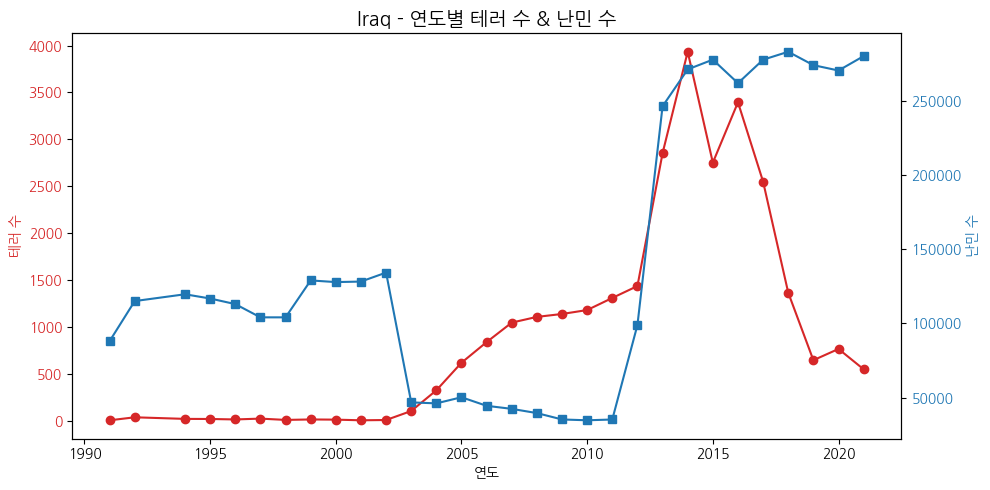

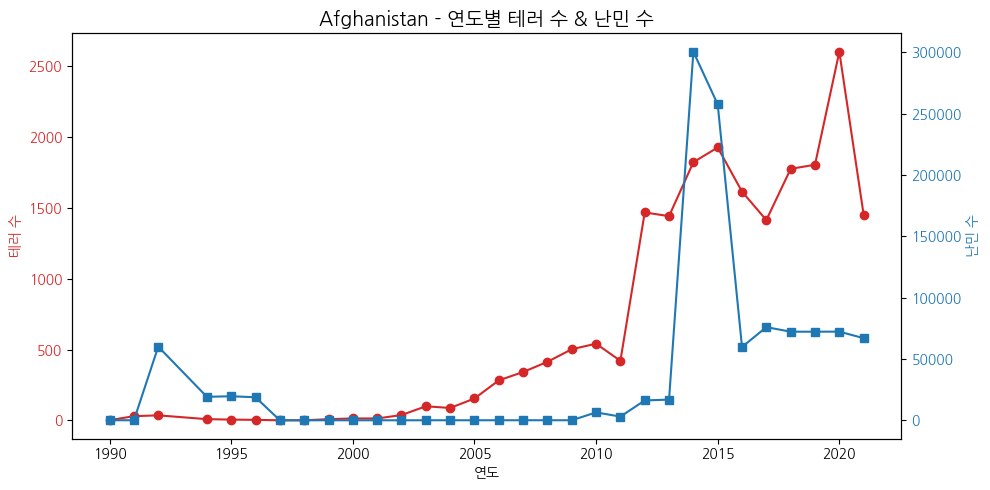

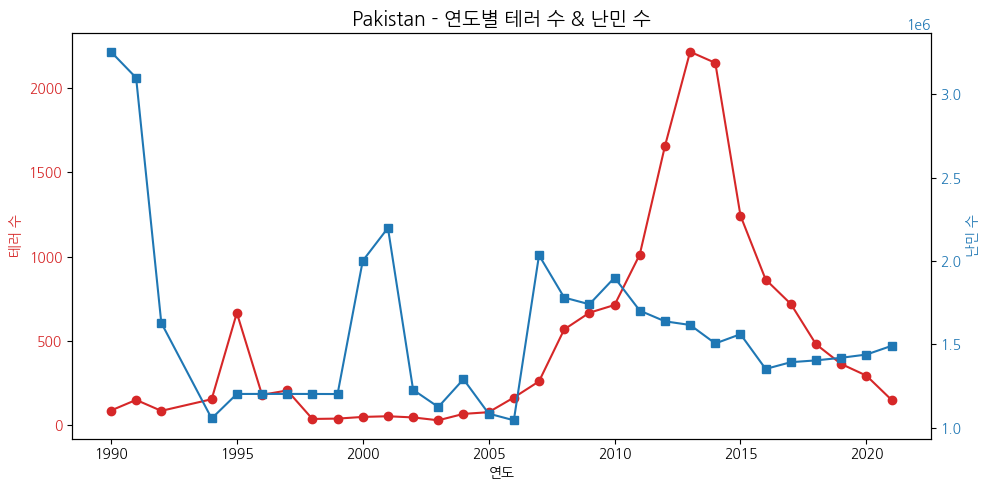

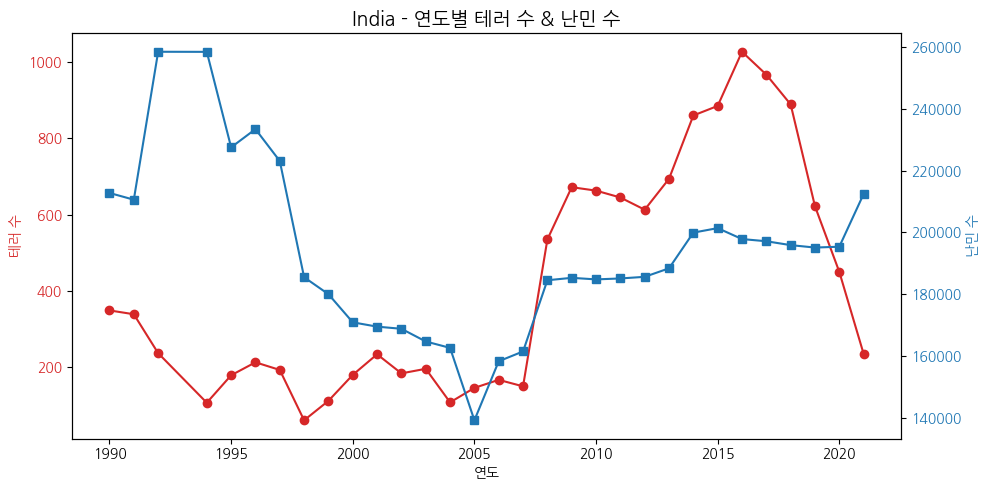

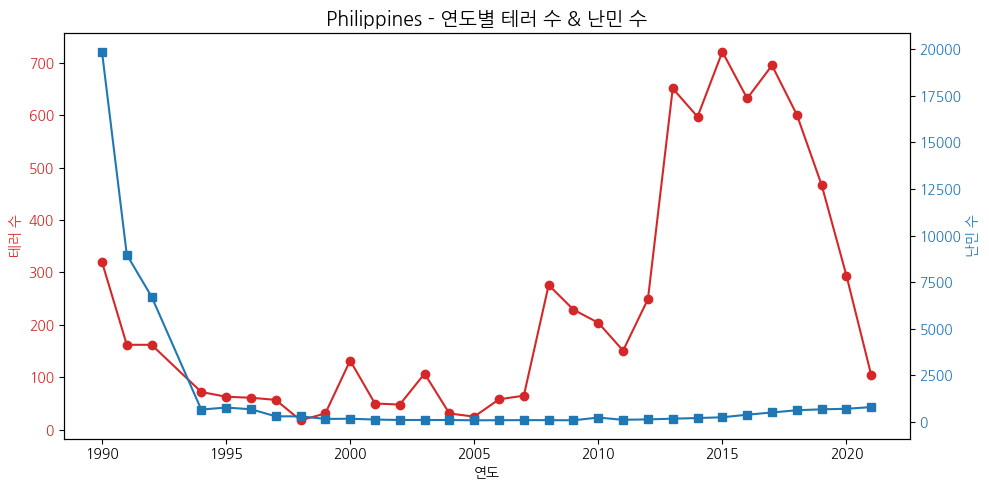

In [ ]:
import matplotlib.pyplot as plt

# ÏãúÍ∞ÅÌôî: Í∞Å Íµ≠Í∞ÄÎ≥Ñ Ïó∞ÎèÑÎ≥Ñ ÌÖåÎü¨ Ïàò & ÎÇúÎØº Ïàò (Ïù¥Ï§ë Ï∂ï Í∑∏ÎûòÌîÑ)
for country in top_5_countries:
    country_data = merged_clean_df[merged_clean_df['Country'] == country]

    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax1.set_title(f"{country} - Ïó∞ÎèÑÎ≥Ñ ÌÖåÎü¨ Ïàò & ÎÇúÎØº Ïàò", fontsize=14)
    ax1.set_xlabel("Ïó∞ÎèÑ")
    ax1.set_ylabel("ÌÖåÎü¨ Ïàò", color='tab:red')
    ax1.plot(country_data['Year'], country_data['Terror_Count'], marker='o', label='ÌÖåÎü¨ Ïàò', color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    ax2 = ax1.twinx()
    ax2.set_ylabel("ÎÇúÎØº Ïàò", color='tab:blue')
    ax2.plot(country_data['Year'], country_data['Refugee'], marker='s', label='ÎÇúÎØº Ïàò', color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    plt.tight_layout()
    plt.show()

**Ïù¥ÎùºÌÅ¨** 2013ÎÖÑ ÌÖåÎü¨ Í∏âÏ¶ùÏùò Ï£ºÏöî ÏõêÏù∏
  1. ÏãúÎ¶¨ÏïÑ ÎÇ¥Ï†ÑÏùò Ïó¨Ìåå (2011~)


  2. Ïù¥ÎùºÌÅ¨ ÎÇ¥ Ï¢ÖÌåå Í∞àÎì± Ïã¨Ìôî (ÏàòÎãàÌåå vs ÏãúÏïÑÌåå)


  3. ÎØ∏Íµ∞ Ï≤†Ïàò Ïù¥ÌõÑÏùò ÏπòÏïà Í≥µÎ∞± (2011ÎÖÑ Îßê ÏôÑÏ†Ñ Ï≤†Ïàò)


  4. ISILÏùò Î≥∏Í≤©Ï†ÅÏù∏ ÌÖåÎü¨ Ï†ÑÎûµ Ï†ÑÍ∞ú ÏãúÏûëÏ†ê




ÏïÑÌîÑÍ∞ÄÎãàÏä§ÌÉÑ 2020ÎÖÑ ÌÖåÎü¨ Í∏âÏ¶ùÏùò Ï£ºÏöî ÏõêÏù∏
  1. ÎØ∏Íµ≠-ÌÉàÎ†àÎ∞ò ÌèâÌôî ÌòëÏ†ï Ï≤¥Í≤∞ (2020.2)

  2. IS-K (Ïù¥Ïä¨ÎûåÍµ≠Í∞Ä Ìò∏ÎùºÏÇ∞ ÏßÄÎ∂Ä)Ïùò ÌÖåÎü¨ ÌôïÎåÄ

  3. Ï†ïÎ∂Ä ÌÜµÏ†úÎ†• ÏïΩÌôî & ÏπòÏïà Í≥µÎ∞±




ÌååÌÇ§Ïä§ÌÉÑ 2013ÎÖÑ ÌÖåÎü¨ Í∏âÏ¶ùÏùò Ï£ºÏöî ÏõêÏù∏
 1. Ï¥ùÏÑ† Ï†ÑÌõÑ Ï†ïÏπò Î∂àÏïàÍ≥º Ï†ïÍ∂å ÍµêÏ≤¥

 2. ÌååÌÇ§Ïä§ÌÉÑ ÌÉàÎ†àÎ∞ò(TTP)Ïùò ÌôúÎèô Í∞ïÌôî

 3. ÏãúÏïÑÌåå ÎåÄÏÉÅ Ï¢ÖÍµê Ìè≠Î†• Ï¶ùÍ∞Ä

 4. Î∂ÅÏÑúÎ∂Ä Î∂ÄÏ°±ÏßÄÏó≠Ïùò Íµ∞ÏÇ¨ÏûëÏ†ÑÍ≥º Î≥¥Î≥µ Í≥µÍ≤©


Ïù∏ÎèÑ 2015ÎÖÑ ÌÖåÎü¨ Í∏âÏ¶ùÏùò Ï£ºÏöî ÏõêÏù∏
 1. Ïû†Î¨¥¬∑Ïπ¥ÏäàÎØ∏Î•¥ ÏßÄÏó≠Ïùò Î¨¥Ïû• Î∂ÑÎ¶¨Ï£ºÏùò Ïö¥Îèô ÏßÄÏÜç

 2. ÎÇòÍ∑∏ÎûúÎìú¬∑ÎßàÎãàÌë∏Î•¥ Îì± Î∂ÅÎèôÎ∂Ä ÏßÄÏó≠Ïùò Î∞òÍµ∞ ÌôúÎèô

 3. ÎßàÏò§Ïù¥Ïä§Ìä∏(Í≥µÏÇ∞Ï£ºÏùò Î¨¥Ïû•ÏÑ∏Î†•, Naxalite) ÌôúÎèô ÏßÄÏÜç

 4. ÌååÌÇ§Ïä§ÌÉÑ Íµ≠Í≤Ω Ïù∏Ï†ëÏßÄÏó≠ÏóêÏÑúÏùò Î¨¥Ïû• Ïπ®Ìà¨


ÌïÑÎ¶¨ÌïÄ 2015ÎÖÑ ÌÖåÎü¨ Í∏âÏ¶ùÏùò Ï£ºÏöî ÏõêÏù∏
 1. ÎØºÎã§ÎÇòÏò§(Mindanao) ÏßÄÏó≠Ïùò Î∂ÑÎ¶¨Ï£ºÏùò Î¨¥Ïû• Í∞àÎì± ÏßÄÏÜç

 2. ÎßàÎßàÏÇ¨ÌååÎÖ∏(Mamasapano) ÏÇ¨Í±¥ (2015.1)

 3. ÏïÑÎ∂Ä ÏÇ¨ÏïºÌîÑ(ASG, Abu Sayyaf Group)Ïùò ÌÖåÎü¨ ÏßÄÏÜç

 4. IS(Ïù¥Ïä¨ÎûåÍµ≠Í∞Ä)Ïùò ÏòÅÌñ•Î†• ÌôïÏÇ∞


In [ ]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np

# ÌÖåÎü¨ ÏÉÅÏúÑ 5Í∞úÍµ≠ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö© (NaN Ï†úÍ±∞)
correlation_df = merged_clean_df[merged_clean_df['Country'].isin(top_5_countries)].dropna()

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
correlation_coefficient, p_value = pearsonr(correlation_df['Terror_Count'], correlation_df['Refugee'])

# ÌöåÍ∑Ä Î∂ÑÏÑù
X = correlation_df[['Terror_Count']]  # ÎèÖÎ¶Ω Î≥ÄÏàò
y = correlation_df['Refugee']         # Ï¢ÖÏÜç Î≥ÄÏàò

reg_model = LinearRegression()
reg_model.fit(X, y)

# ÌöåÍ∑Ä Í≤∞Í≥º ÏòàÏ∏° Î∞è Í∏∞Ïö∏Í∏∞/Ï†àÌé∏ Ï†ÄÏû•
slope = reg_model.coef_[0]
intercept = reg_model.intercept_
r_squared = reg_model.score(X, y)

{
    "ÏÉÅÍ¥ÄÍ≥ÑÏàò (r)": float(round(correlation_coefficient, 3)),
    "p-value": float(round(p_value, 4)),
    "ÌöåÍ∑Ä Í∏∞Ïö∏Í∏∞ (slope)": float(round(slope, 2)),
    "Ï†àÌé∏ (intercept)": float(round(intercept, 2)),
    "ÏÑ§Î™ÖÎ†• (R¬≤)": float(round(r_squared, 3))
}

{'ÏÉÅÍ¥ÄÍ≥ÑÏàò (r)': 0.017,
 'p-value': 0.8316,
 'ÌöåÍ∑Ä Í∏∞Ïö∏Í∏∞ (slope)': 15.6,
 'Ï†àÌé∏ (intercept)': 383542.82,
 'ÏÑ§Î™ÖÎ†• (R¬≤)': 0.0}

ÌÖåÎü¨ Ïàò top5 Íµ≠Í∞ÄÎ•º ÎåÄÏÉÅÏúºÎ°ú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑùÍ≥º ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÌÜµÌï¥ Ï∂îÎ°† ÌÜµÍ≥ÑÌïú Í≤∞Í≥º ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.017Ïù¥Î©∞ p-valueÍ∞Ä 0.8316ÏúºÎ°ú Í±∞Ïùò Í¥ÄÎ†®Ïù¥ ÏóÜÏúºÎ©∞ ÌöåÍ∑Ä Í∏∞Ïö∏Í∏∞Îäî 15.6ÏúºÎ°ú ÌÖåÎü¨ Îãπ ÎÇúÎØº ÏàòÍ∞Ä 15.6 Ï†ïÎèÑ ÏÉÅÏäπÌïòÎäî Í±∏Î°ú Î≥¥ÏïÑ ÌÅ∞ Í¥ÄÎ†®Ïù¥ ÏóÜÏñ¥ Î≥¥Ïù¥Î©∞ ÏÑ§Î™ÖÎ†•Ïù¥ ÏïΩÌïòÎã§.

In [16]:
refugee['Country'] = refugee['Country'].replace({'T√ºrkiye': 'Turkey', 'Iran (Islamic Rep. of)': 'Iran'})


# ÎÇúÎØº ÏàòÍ∞Ä Í∞ÄÏû• ÎßéÏùÄ ÏÉÅÏúÑ 5Í∞ú Íµ≠Í∞Ä (ÏàòÏö©Íµ≠ Í∏∞Ï§Ä)
top5_refugee_countries = (
    refugee.groupby('Country')['Refugee']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
    .tolist()
)

top5_refugee_countries

['Iran', 'Pakistan', 'Germany', 'Turkey', 'Sudan']

In [40]:
# ÏàòÏö© ÎÇúÎØº Ïàò ÏÉÅÏúÑ 5Í∞úÍµ≠ Ï∂îÏ∂ú
top5_host_countries = refugee.groupby("Country")["Refugee"].sum().nlargest(5).reset_index()
top5_host_countries.columns = ["Country of Asylum", "Total Refugees"]

top5_host_countries

Country of Asylum  Total Refugees
0              Iran        50506683
1          Pakistan        50485218
2           Germany        27633293
3            Turkey        26266053
4             Sudan        15312731

In [17]:
# Î≥ëÌï© Ï§ÄÎπÑ
refugee_top5_host_final = refugee[refugee['Country'].isin(top5_refugee_countries)]
refugee_host_grouped_final = refugee_top5_host_final.groupby(['Year', 'Country'])['Refugee'].sum().reset_index()

terror_host_top5_final = (
    terror[terror['Country'].isin(top5_refugee_countries)]
    .groupby(['iyear', 'Country'])
    .size()
    .reset_index(name='Terror_Count')
    .rename(columns={'iyear': 'Year', 'Country': 'Country'})
)

# Î≥ëÌï©
merged_host_final = pd.merge(refugee_host_grouped_final, terror_host_top5_final, on=['Year', 'Country'], how='left')

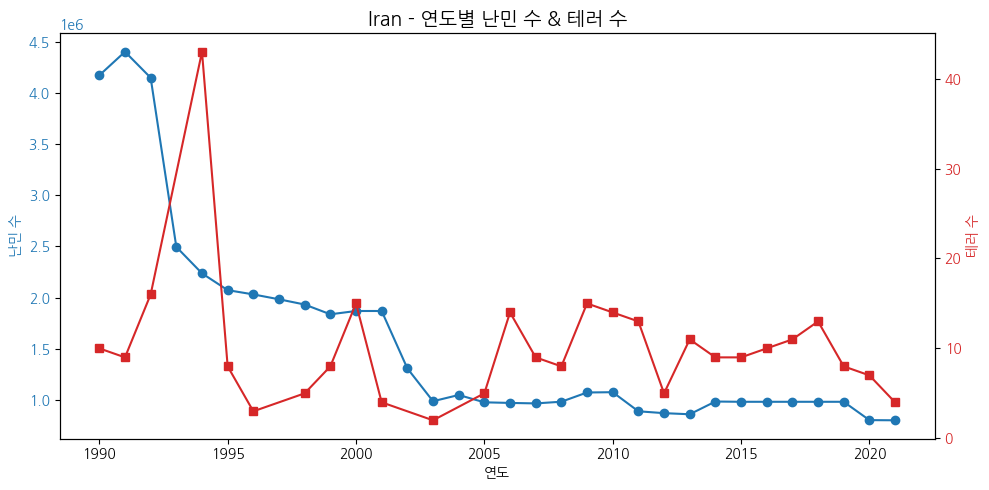

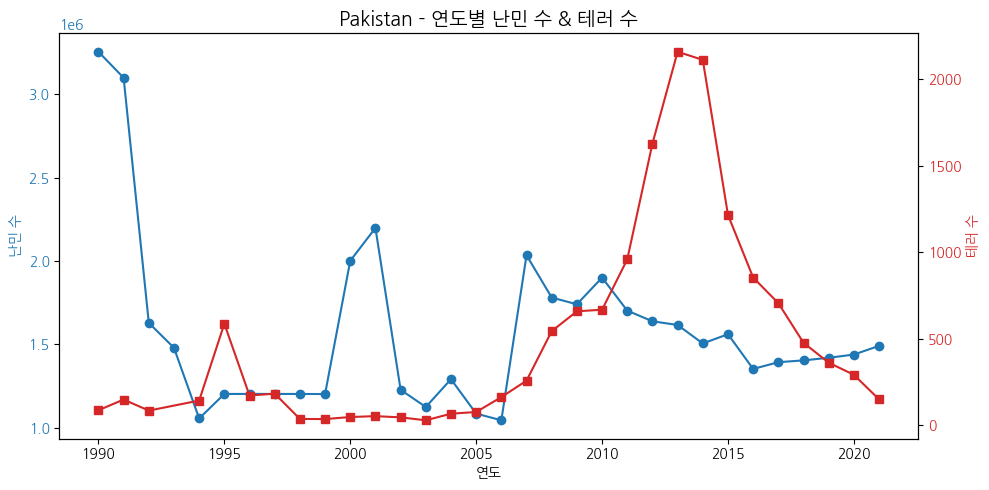

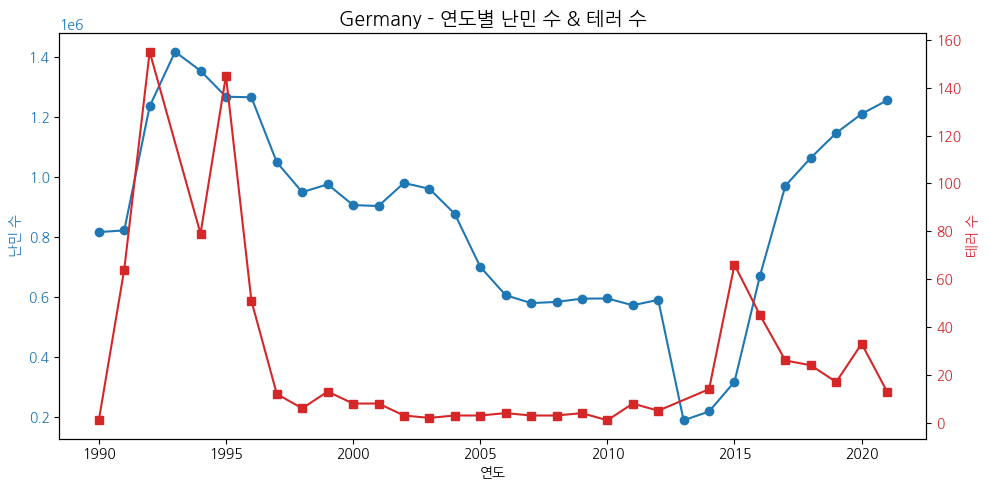

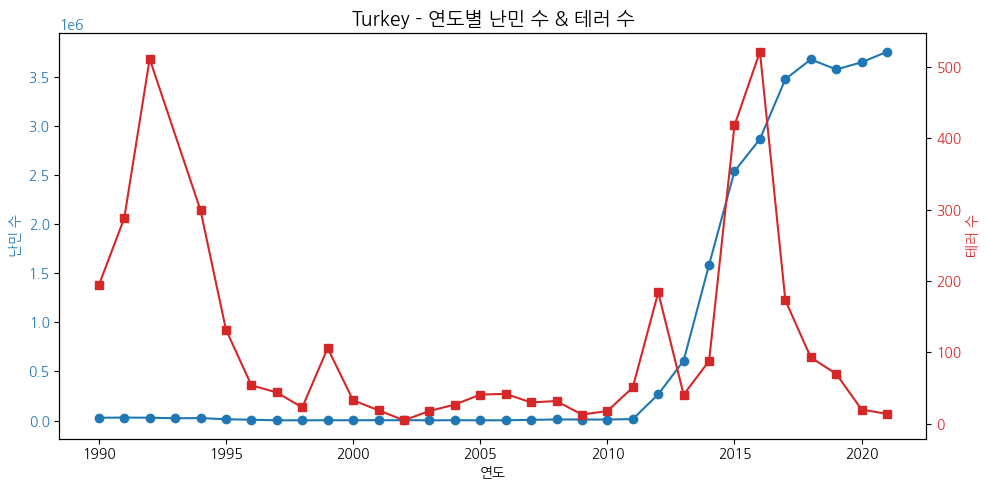

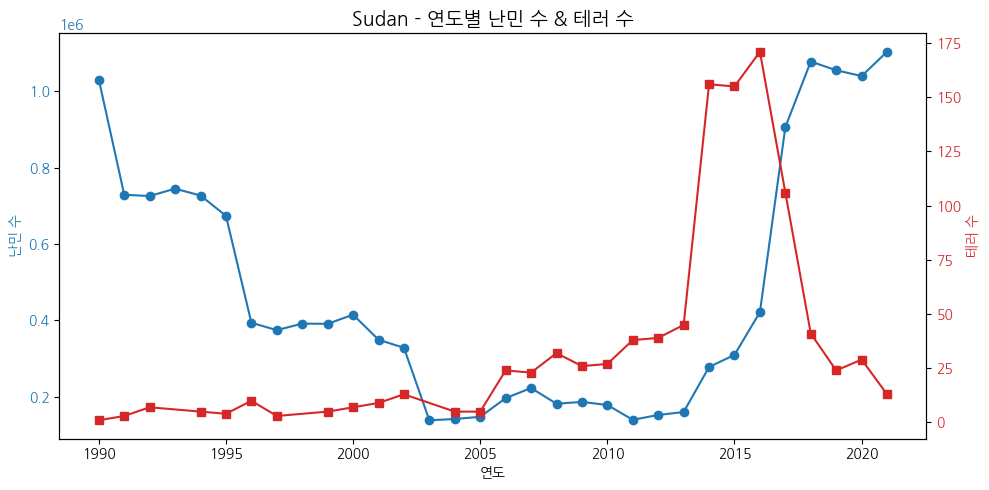

In [ ]:
# ÏãúÍ∞ÅÌôî: ÏµúÏ¢Ö Ï†ïÎ¶¨
for country in top5_refugee_countries:
    country_data = merged_host_final[merged_host_final['Country'] == country]

    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax1.set_title(f"{country} - Ïó∞ÎèÑÎ≥Ñ ÎÇúÎØº Ïàò & ÌÖåÎü¨ Ïàò", fontsize=14)
    ax1.set_xlabel("Ïó∞ÎèÑ")
    ax1.set_ylabel("ÎÇúÎØº Ïàò", color='tab:blue')
    ax1.plot(country_data['Year'], country_data['Refugee'], marker='o', label='ÎÇúÎØº Ïàò', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # ÌÖåÎü¨ Ïàò NaN Ï†úÏô∏
    terror_data = country_data.dropna(subset=['Terror_Count'])
    ax2 = ax1.twinx()
    ax2.set_ylabel("ÌÖåÎü¨ Ïàò", color='tab:red')
    ax2.plot(terror_data['Year'], terror_data['Terror_Count'], marker='s', label='ÌÖåÎü¨ Ïàò', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.tight_layout()
    plt.show()

Ïù¥ÎûÄÏùò 1994ÎÖÑ ÌÖåÎü¨ Í∏âÏ¶ùÏùò Ï£ºÏöî ÏõêÏù∏

1. AMIA ÌÖåÎü¨	Ïù¥ÎûÄÏù¥ Î∞∞ÌõÑÎ°ú ÏßÄÎ™©Îê® (Íµ≠Ï†úÏ†Å Ïù¥ÎØ∏ÏßÄ ÏïÖÌôî)
2. Î∞òÏ≤¥Ï†ú ÏÑ∏Î†•Í≥º Ï∂©Îèå	ÎÇ¥Ïô∏Î∂ÄÏ†Å ÌÖåÎü¨ ÌôúÎèô Ï¶ùÍ∞Ä
3. Î¨¥Ïû• Îã®Ï≤¥ ÏßÄÏõê	Ìó§Ï¶àÎ≥ºÎùº Îì± ÏßÄÏõêÏúºÎ°ú Íµ≠Ï†ú ÏÇ¨ÌöåÏóêÏÑú ‚ÄòÌÖåÎü¨ ÌõÑÏõêÍµ≠‚Äô Ïù¥ÎØ∏ÏßÄ
4. Íµ≠Ï†ú Ï†úÏû¨	Í≥†Î¶Ω ÏÜçÏóê Í∏âÏßÑÌôîÎêú Ïô∏Íµê Ï†ïÏ±Ö

ÎèÖÏùºÏùò 2015ÎÖÑ ÌÖåÎü¨ Í∏âÏ¶ùÏùò Ï£ºÏöî ÏõêÏù∏
1.  ÏãúÎ¶¨ÏïÑ ÎÇ¥Ï†ÑÍ≥º ÎÇúÎØº ÎåÄÎüâ Ïú†ÏûÖ
2.  IS(Ïù¥Ïä¨ÎûåÍµ≠Í∞Ä)Ïùò Ïú†ÎüΩ ÌÖåÎü¨ ÌôïÎåÄ Ï†ÑÎûµ
3.  Í∑πÏö∞Ï£ºÏùòÏôÄ Î∞òÏù¥Ïä¨Îûå ÌÖåÎü¨ÎèÑ Ï¶ùÍ∞Ä
4.  Í≥µÍ∂åÎ†• Î∞è Ï†ïÎ≥¥Í∏∞Í¥ÄÏùò Í≤ΩÍ≥Ñ Í∞ïÌôî

ÌäÄÎ•¥ÌÇ§ÏòàÏùò 2015ÎÖÑ ÌÖåÎü¨ Í∏âÏ¶ùÏùò Ï£ºÏöî ÏõêÏù∏
1. IS(Ïù¥Ïä¨ÎûåÍµ≠Í∞Ä, Îã§ÏóêÏãú)Ïùò ÏßÅÏ†ëÏ†ÅÏù∏ Í≥µÍ≤©
2. Ïø†Î•¥ÎìúÏ°± Î¨∏Ï†úÏôÄ ÎÇ¥Ï†Ñ Ïû¨Í∞ú
3. Ï†ïÏπòÏ†Å Î∂àÏïàÏ†ïÍ≥º ÏÑ†Í±∞ Ïù¥Ïäà
4. ÏãúÎ¶¨ÏïÑ Ï†ÑÏüÅÍ≥º ÎÇúÎØº Î¨∏Ï†ú

ÏàòÎã®Ïùò 2015ÎÖÑ ÌÖåÎü¨ Í∏âÏ¶ùÏùò Ï£ºÏöî ÏõêÏù∏
1. IS Î∞è Í∑πÎã®Ï£ºÏùò Ï°∞ÏßÅÏùò Ïπ®Ìà¨ ÏãúÎèÑ
2. Îã§Î•¥Ìë∏Î•¥ ÏßÄÏó≠Ïùò Î¨¥Ïû• Ï∂©Îèå ÏßÄÏÜç
3. ÎÇ®ÏàòÎã®Í≥ºÏùò Íµ≠Í≤Ω Í∏¥Ïû• ÏÉÅÌÉú

In [ ]:
# ÎÇúÎØº Ïàò Í∏∞Ï§Ä ÏÉÅÏúÑ 5Í∞úÍµ≠ ÎåÄÏÉÅ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï§ÄÎπÑ
refugee_corr_df = merged_host_final[merged_host_final['Country'].isin(top5_refugee_countries)].dropna()

# ÏÉÅÍ¥ÄÍ≥ÑÏàò
corr_r, corr_p = pearsonr(refugee_corr_df['Terror_Count'], refugee_corr_df['Refugee'])

# ÌöåÍ∑Ä Î∂ÑÏÑù
X_r = refugee_corr_df[['Terror_Count']]
y_r = refugee_corr_df['Refugee']

reg_model_r = LinearRegression()
reg_model_r.fit(X_r, y_r)

# Í≤∞Í≥º ÏöîÏïΩ
slope_r = reg_model_r.coef_[0]
intercept_r = reg_model_r.intercept_
r_squared_r = reg_model_r.score(X_r, y_r)

{
    "ÏÉÅÍ¥ÄÍ≥ÑÏàò (r)": float(round(corr_r, 3)),
    "p-value": float(round(corr_p, 4)),
    "ÌöåÍ∑Ä Í∏∞Ïö∏Í∏∞ (slope)": float(round(slope_r, 2)),
    "Ï†àÌé∏ (intercept)": float(round(intercept_r, 2)),
    "ÏÑ§Î™ÖÎ†• (R¬≤)": float(round(r_squared_r, 3))
}

{'ÏÉÅÍ¥ÄÍ≥ÑÏàò (r)': 0.162,
 'p-value': 0.049,
 'ÌöåÍ∑Ä Í∏∞Ïö∏Í∏∞ (slope)': 465.86,
 'Ï†àÌé∏ (intercept)': 1002204.48,
 'ÏÑ§Î™ÖÎ†• (R¬≤)': 0.026}

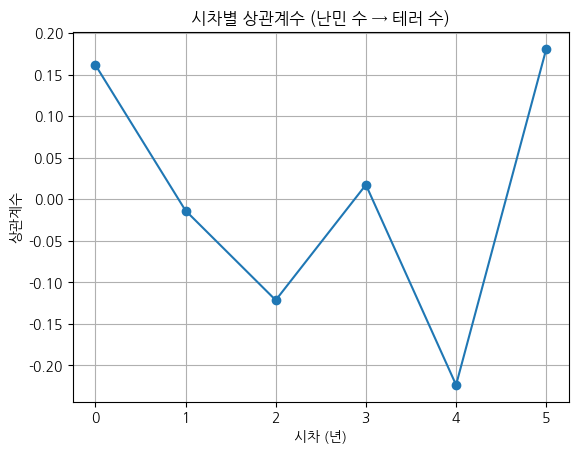

ÏãúÏ∞® (ÎÖÑ)      ÏÉÅÍ¥ÄÍ≥ÑÏàò
0       0  0.161587
1       1 -0.013683
2       2 -0.121478
3       3  0.017333
4       4 -0.223472
5       5  0.180828

In [19]:
# ÏµúÎåÄ ÏãúÏ∞® ÏÑ§Ï†ï (Ïòà: 5ÎÖÑ)
max_lag = 5
lags = list(range(0, max_lag + 1))
correlations = []

# ÏãúÏ∞®Î≥Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
for lag in lags:
    shifted_refugee = merged_host_final["Refugee"].shift(lag)
    corr = shifted_refugee.corr(merged_host_final["Terror_Count"])
    correlations.append(corr)

# ÏãúÍ∞ÅÌôî
plt.plot(lags, correlations, marker='o')
plt.title("ÏãúÏ∞®Î≥Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò (ÎÇúÎØº Ïàò ‚Üí ÌÖåÎü¨ Ïàò)")
plt.xlabel("ÏãúÏ∞® (ÎÖÑ)")
plt.ylabel("ÏÉÅÍ¥ÄÍ≥ÑÏàò")
plt.grid(True)
plt.xticks(lags)
plt.show()

# Í≤∞Í≥ºÎèÑ ÌëúÎ°ú Ìï®Íªò Ï∂úÎ†•
pd.DataFrame({"ÏãúÏ∞® (ÎÖÑ)": lags, "ÏÉÅÍ¥ÄÍ≥ÑÏàò": correlations})

ÎÇúÎØº Ïàò top5 Íµ≠Í∞ÄÎ•º ÎåÄÏÉÅÏúºÎ°ú Î¥§ÏùÑ Îïå ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.163ÏúºÎ°ú ÏïΩÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÎùÑÎ©∞ p-vlaueÍ∞Ä 0.0473ÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï®ÏùÑ ÎÇòÌÉÄÎÇ∏Îã§. ÎòêÌïú ÌöåÍ∑Ä Í∏∞Ïö∏Í∏∞Îäî 457.7Î°ú ÌÖåÎü¨ Îãπ ÎÇúÎØº ÏàòÍ∞Ä ÏïΩ 457Î™Ö Ï†ïÎèÑ ÎäòÏñ¥ÎÇ®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.



*   Í∞ÄÏÑ§ 4: "ÎÇúÎØº ÏàòÍ∞Ä ÎäòÏñ¥ÎÇòÎ©¥ ÌÖåÎü¨ ÏàòÎèÑ ÎäòÏñ¥ÎÇ† Í≤ÉÏù¥Îã§." -> ÏÇ¨Ïö©Ìïú Í∏∞Î≤ï: ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Î∞è ÌöåÍ∑ÄÎ∂ÑÏÑù
*   Ïù¥Ïú†:

1.   Îëê Î≥ÄÏàò Î™®Îëê ÏàòÏπòÌòï Î≥ÄÏàòÏù¥Í∏∞ ÎïåÎ¨∏
2.   Í¥ÄÍ≥ÑÏùò Î∞©Ìñ•ÏÑ±Í≥º Í∞ïÎèÑ, Í∑∏Î¶¨Í≥† ÏòàÏ∏° Í∞ÄÎä•ÏÑ±ÍπåÏßÄ Ìï®Íªò ÌôïÏù∏Ìï† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏
3.   Îç∞Ïù¥ÌÑ∞Í∞Ä ÏãúÍ∞Ñ Ï∂ïÏóê Îî∞Îùº Ï∏°Ï†ïÎêú ‚ÄòÌå®ÎÑê ÌòïÌÉú‚ÄôÏó¨ÏÑú Îã®Ïùº ÎπÑÍµêÎ≥¥Îã§ Ï∂îÏÑ∏ Î∂ÑÏÑùÏù¥ Ï†ÅÌï©ÌïòÍ∏∞ ÎïåÎ¨∏



*   ÌïµÏã¨ ÏßàÎ¨∏


1.   ÎÇúÎØºÏùÑ Îçî ÎßéÏù¥ ÏàòÏö©ÌïòÎäî Íµ≠Í∞ÄÎäî ÌÖåÎü¨Í∞Ä Îçî ÎßéÏù¥ ÏùºÏñ¥ÎÇòÎäîÍ∞Ä?
2.   ÌÖåÎü¨ ÏàòÏôÄ ÎÇúÎØº Ïàò ÏÇ¨Ïù¥Ïóê ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥ÑÍ∞Ä Ï°¥Ïû¨ÌïòÎäîÍ∞Ä?








